# Praktikum 5

# 1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!

Perbedaan dari code single linkage dan average linkage hanya pada perubahan parameter yang semula linkage = 'single' menjadi linkage = 'average'. Sehingga hasil clustering akan berbeda karena parameter yang digunakan berbeda. Single linkage, jarak antar 2 cluster akan ditentukan dari jarak terpendek antara titik-titik dalam 2 cluster dan akan  menggabungkan cluster jika ada 2 titik yang saling berdekatan walaupun keseluruhan cluster tersebar luas. Sedangkan average linkage, jarak antar 2 cluster ditentukan dari rata-rata jarak antara semua pasangan titik dari 2 cluster sehingga clustering yang dihasilkan akan lebih stabil.

## Preparation

Import

In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import library yang dibutuhkan untuk proses agglomerative clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

Generate Random Data

In [ ]:
X1, y1 = make_blobs(n_samples=50, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)

Plotting Random Data

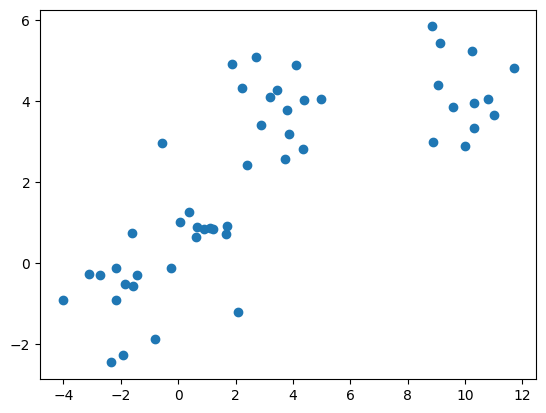

In [ ]:
# Plotting Random Data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [ ]:
# Menampilkan dimensi generate data
X1.shape

(50, 2)

## Agglomerative Clustering

## 1. Single Linkage

In [ ]:
# Inisialisasi objek AgglomerativeClustering
# n_clusters=4 untuk menentukan jumlah cluster yang akan dibentuk yaitu 4 cluster
# linkage='single' : untuk menentukan metode linkage yang dipakai yaitu single linkage
agglom_single = AgglomerativeClustering(n_clusters=4, linkage='single')

# Melatih model pengelompokan pada dataset
single_linkage = agglom_single.fit(X1, y1)
agglom_single.labels_

array([0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

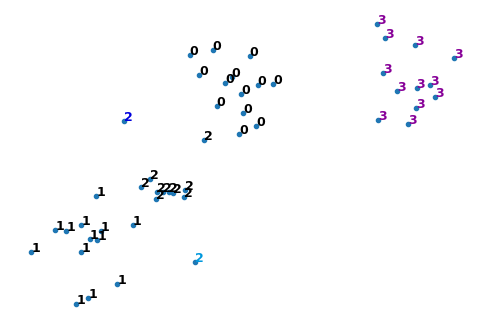

In [ ]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Menentukan minimum dan maksimum range dari X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk display semua datapoints
for i in range(X1.shape[0]):
    # Menambahkan teks yang menunjukkan informasi label atau kategori data pada setiap titik scatter plot
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom_single.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Hapus X ticks, Y ticks, dan X Y axis (garis koordinat)
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Menampilkan plot dari data asli sebelum di cluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

Plotting Dendogram

In [ ]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1, X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         0.60952155 0.314079   ... 0.56204694 0.65324871 0.32236481]
 [0.60952155 0.         0.477346   ... 0.05058905 0.14494528 0.28716214]
 [0.314079   0.477346   0.         ... 0.42784396 0.58402402 0.27164928]
 ...
 [0.56204694 0.05058905 0.42784396 ... 0.         0.17612255 0.23993528]
 [0.65324871 0.14494528 0.58402402 ... 0.17612255 0.         0.34634038]
 [0.32236481 0.28716214 0.27164928 ... 0.23993528 0.34634038 0.        ]]


In [ ]:
# Memberikan parameter pada kelas linkage dari hierarki
# Menggunakan modul scipy cluster hierarchy untuk menentukan pengelompokan cluster hierarchy dengan memanfaatkan matriks jarak (dist_matrix)
x = hierarchy.linkage(dist_matrix, 'single')

<ipython-input-14-e694b059199d>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  x = hierarchy.linkage(dist_matrix, 'single')


Text(0.5, 1.0, 'Single Linkage')

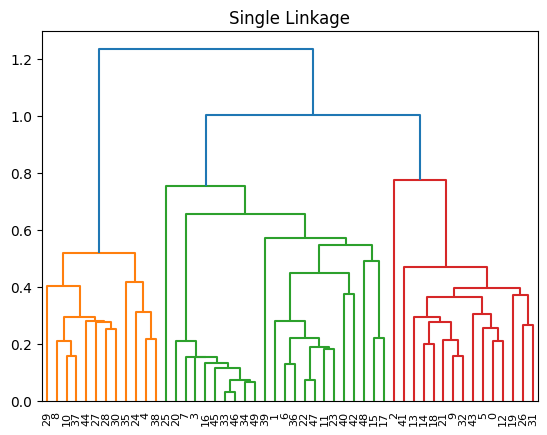

In [ ]:
# Single Linkage
dendroX = hierarchy.dendrogram(x)
plt.title('Single Linkage')

## 2. Average Linkage

In [ ]:
# Inisialisasi objek AgglomerativeClustering
# n_clusters=4 untuk menentukan jumlah cluster yang akan dibentuk yaitu 4 cluster
# linkage='average' : untuk menentukan metode average yang dipakai yaitu average linkage
agglom_average = AgglomerativeClustering(n_clusters=4, linkage='average')

# Melatih model pengelompokan pada dataset
average_linkage = agglom_average.fit(X1, y1)
agglom_average.labels_

array([1, 0, 3, 0, 2, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 0])

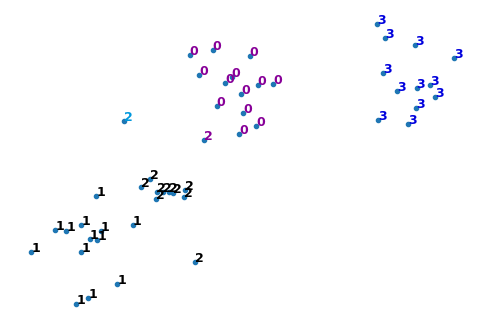

In [ ]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Menentukan minimum dan maksimum range dari X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk display semua datapoints
for i in range(X1.shape[0]):
    # Menambahkan teks yang menunjukkan informasi label atau kategori data pada setiap titik scatter plot
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom_average.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Hapus X ticks, Y ticks, dan X Y axis (garis koordinat)
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Menampilkan plot dari data asli sebelum di cluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

In [ ]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1, X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         0.60952155 0.314079   ... 0.56204694 0.65324871 0.32236481]
 [0.60952155 0.         0.477346   ... 0.05058905 0.14494528 0.28716214]
 [0.314079   0.477346   0.         ... 0.42784396 0.58402402 0.27164928]
 ...
 [0.56204694 0.05058905 0.42784396 ... 0.         0.17612255 0.23993528]
 [0.65324871 0.14494528 0.58402402 ... 0.17612255 0.         0.34634038]
 [0.32236481 0.28716214 0.27164928 ... 0.23993528 0.34634038 0.        ]]


In [ ]:
y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-17-5b400d3c74b4>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  y = hierarchy.linkage(dist_matrix, 'average')


Text(0.5, 1.0, 'Average Linkage')

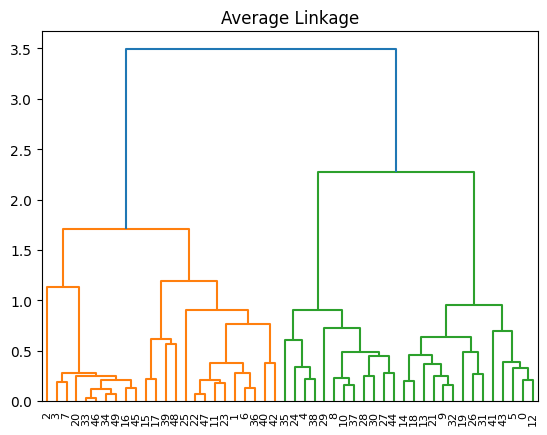

In [ ]:
# Average Linkage
dendroY = hierarchy.dendrogram(y)
plt.title('Average Linkage')

# 2. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!

Sama seperti sebelunya, perbedaan code pada single linkage dan average linkage hanya pada parameternya. Pada SciPy menggunakan input matriks jarak. SciPy langsung menangani data berbentuk matriks jarak sehingga cocok untuk analisis hierarki dengan dendrogram. Sedangkan scikit-learn menerima input dataset multidimensi tanpa perlu menghitung matriks jarak. Model akan menghasilkan label cluster untuk setiap data.

## Preparation

Import Dataset

In [ ]:
# Memuat Dataset
pdf = pd.read_csv('/content/drive/MyDrive/Akademik/Dataset/cars_clus.csv')
print("Shape of Dataset", pdf.shape)
pdf.head(5)

Shape of Dataset (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


Data Cleaning

In [ ]:
# Data Cleaning
print("Shape of dataset before cleaning: ", pdf.size)

Shape of dataset before cleaning:  2544


In [ ]:
# Check the available columns in the DataFrame
print(pdf.columns)

# Convert columns to numeric (only include the existing columns)
columns_to_convert = ['sales', 'resale', 'type', 'price', 'engine_s', 'horsepower', 'wheelbase', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'insales']

# Filter columns that exist in the DataFrame
columns_existing = [col for col in columns_to_convert if col in pdf.columns]

# Apply pd.to_numeric to existing columns only
pdf[columns_existing] = pdf[columns_existing].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
pdf = pdf.dropna()

# Reset index
pdf = pdf.reset_index(drop=True)

# Print dataset size after cleaning
print("Shape of dataset after cleaning:", pdf.size)
pdf.head(5)

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')
Shape of dataset after cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.15,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


In [ ]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

# Normalization
from sklearn.preprocessing import MinMaxScaler

# Mengubah dataFrame ke array numpy
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Melakukan normalisasi
feature_mtx = min_max_scaler.fit_transform(x)
print(feature_mtx[0:5])

# Clustering with Scipy
# Menghitung jarak antar cluster data
import scipy

# Mendapatkan panjang dataset
leng = feature_mtx.shape[0]

# Membuat matrix kosong
D = np.zeros((leng, leng))

# Menghitung jarak euclidean
for i in range(leng):
    for j in range(leng):
        # Matriks D berisi jarak Euclidean antara semua pasangan data
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

[[0.11428571 0.21518987 0.18655098 0.28143713 0.30625832 0.2310559
  0.13364055 0.43333333]
 [0.31428571 0.43037975 0.3362256  0.46107784 0.5792277  0.50372671
  0.31797235 0.33333333]
 [0.35714286 0.39240506 0.47722343 0.52694611 0.62849534 0.60714286
  0.35483871 0.23333333]
 [0.11428571 0.24050633 0.21691974 0.33532934 0.38082557 0.34254658
  0.28110599 0.4       ]
 [0.25714286 0.36708861 0.34924078 0.80838323 0.56724368 0.5173913
  0.37788018 0.23333333]]


## 1. Single Linkage

In [ ]:
import pylab
import scipy.cluster.hierarchy

# Melakukan hierarchical clustering menggunakan metode complete linkage pada matriks jarak
S = hierarchy.linkage(D, 'single')

<ipython-input-43-9e37c74c4588>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  S = hierarchy.linkage(D, 'single')


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Jika jarak antara dua cluster lebih besar dari 3, mereka tidak akan digabungkan.
max_d = 3
clusters = fcluster(S, max_d, criterion='distance')

# Output the clusters
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

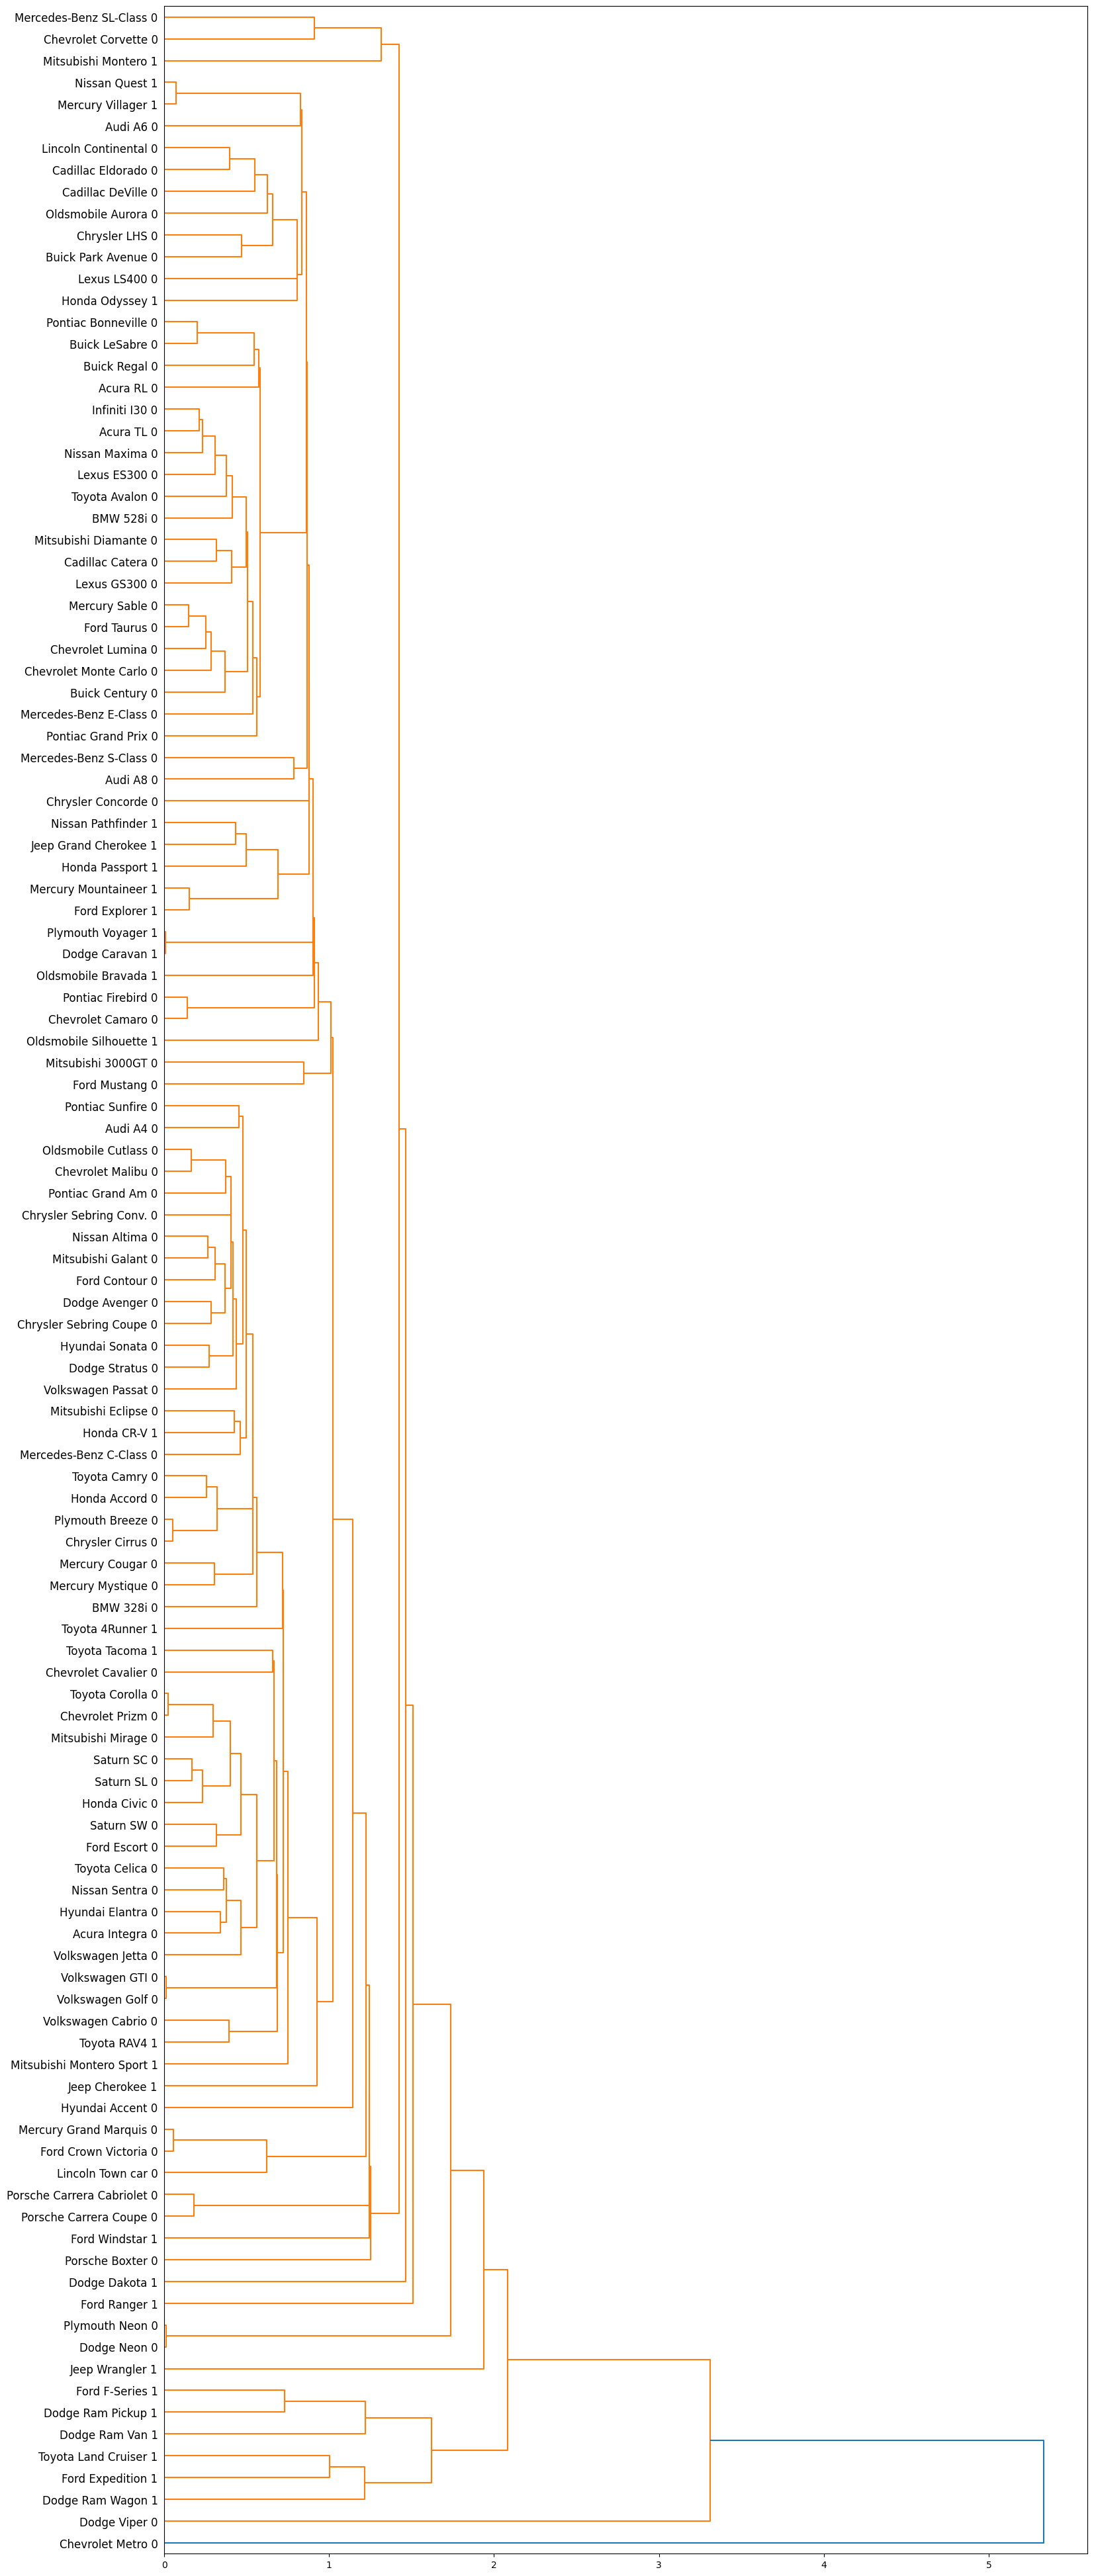

In [ ]:
# Membuat sebuah figure baru untuk plot dendrogram dengan ukuran 18 x 50 inci
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk menghasilkan label pada setiap daun (leaf) dalam dendrogram
# Label yang ditampilkan akan berisi informasi tentang 'manufact', 'model', dan 'type'
# Berdasarkan data yang ada dalam dataframe 'pdf'
def llf(id):
    # Format label: [manufact_name model_name type_as_integer]
    return ('%s %s %s' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id]))))

# Membuat dan menggambar dendrogram berdasarkan hasil linkage (Z)
# Dengan menampilkan label pada setiap daun yang dihasilkan oleh fungsi 'llf'
leaf_rotation=0  # artinya label tidak diputar, tetap horizontal
leaf_font_size=12  # Mengatur ukuran font label pada daun
orientation='right'  # Mengatur orientasi dendrogram agar berkembang dari kiri ke kanan

dendro = hierarchy.dendrogram(
    S,
    leaf_label_func=llf,  # Fungsi untuk menghasilkan label daun
    leaf_rotation=leaf_rotation,  # Fungsi memutar label, tetap horizontal
    leaf_font_size=leaf_font_size,  # Ukuran font untuk label
    orientation=orientation  # Orientasi dendrogram dari kiri ke kanan
)

In [ ]:
# Menghitung matriks jarak antara setiap pasangan titik dalam feature_mtx
# distance_matrix adalah fungsi dari scipy.spatial yang digunakan untuk menghitung jarak antar dua himpunan titik
# Dalam hal ini, kita menghitung jarak Euclidean antara setiap titik di feature_mtx dengan semua titik lainnya di feature_mtx
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Menampilkan matriks jarak yang dihitung
# Matriks ini berisi nilai jarak antar setiap pasangan titik data di feature_mtx
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [ ]:
# Membuat objek AgglomerativeClustering dengan parameter n_clusters = 6 dan linkage = 'single'
# n_clusters = 6 menunjukkan bahwa kita ingin membagi data ke dalam 6 cluster
# linkage = 'complete' berarti kita menggunakan metode linkage lengkap (single linkage) dalam penggabungan kluster
# Metode 'single' mengukur jarak antara dua kluster berdasarkan jarak terjauh antara elemen-elemen di kedua kluster tersebut
agglom_sing = AgglomerativeClustering(n_clusters=6, linkage='single')

# Melatih model clustering pada data yang ada di feature_mtx
# fit() digunakan untuk menyesuaikan model pada data dan menghasilkan hasil clustering
# feature_mtx adalah matriks fitur yang berisi data yang akan dikelompokkan
agglom_sing.fit(feature_mtx)

# Menampilkan label kluster untuk setiap titik data
# labels_ berisi hasil kluster yang dihasilkan oleh algoritma Agglomerative Clustering
# Setiap titik data akan diberikan label kluster sesuai dengan kluster tempat titik tersebut berada
agglom_sing.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [ ]:
# Menambahkan kolom baru 'cluster_' pada DataFrame 'pdf' yang berisi label kluster
# Label kluster ini diperoleh dari hasil klasterisasi menggunakan model agglomerative clustering
# agglom.labels_ berisi array label kluster untuk setiap titik data dalam feature_mtx
# Setiap titik data akan diberikan label sesuai dengan kluster yang ditempatinya, dan nilai label ini ditambahkan ke dalam DataFrame pdf
pdf['cluster_'] = agglom_sing.labels_

# Menampilkan 5 baris pertama dari DataFrame 'pdf' untuk melihat hasil klasterisasi
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.15,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


<ipython-input-72-d81de9f83962>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, subset.price*10, c=color, label='cluster' + str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

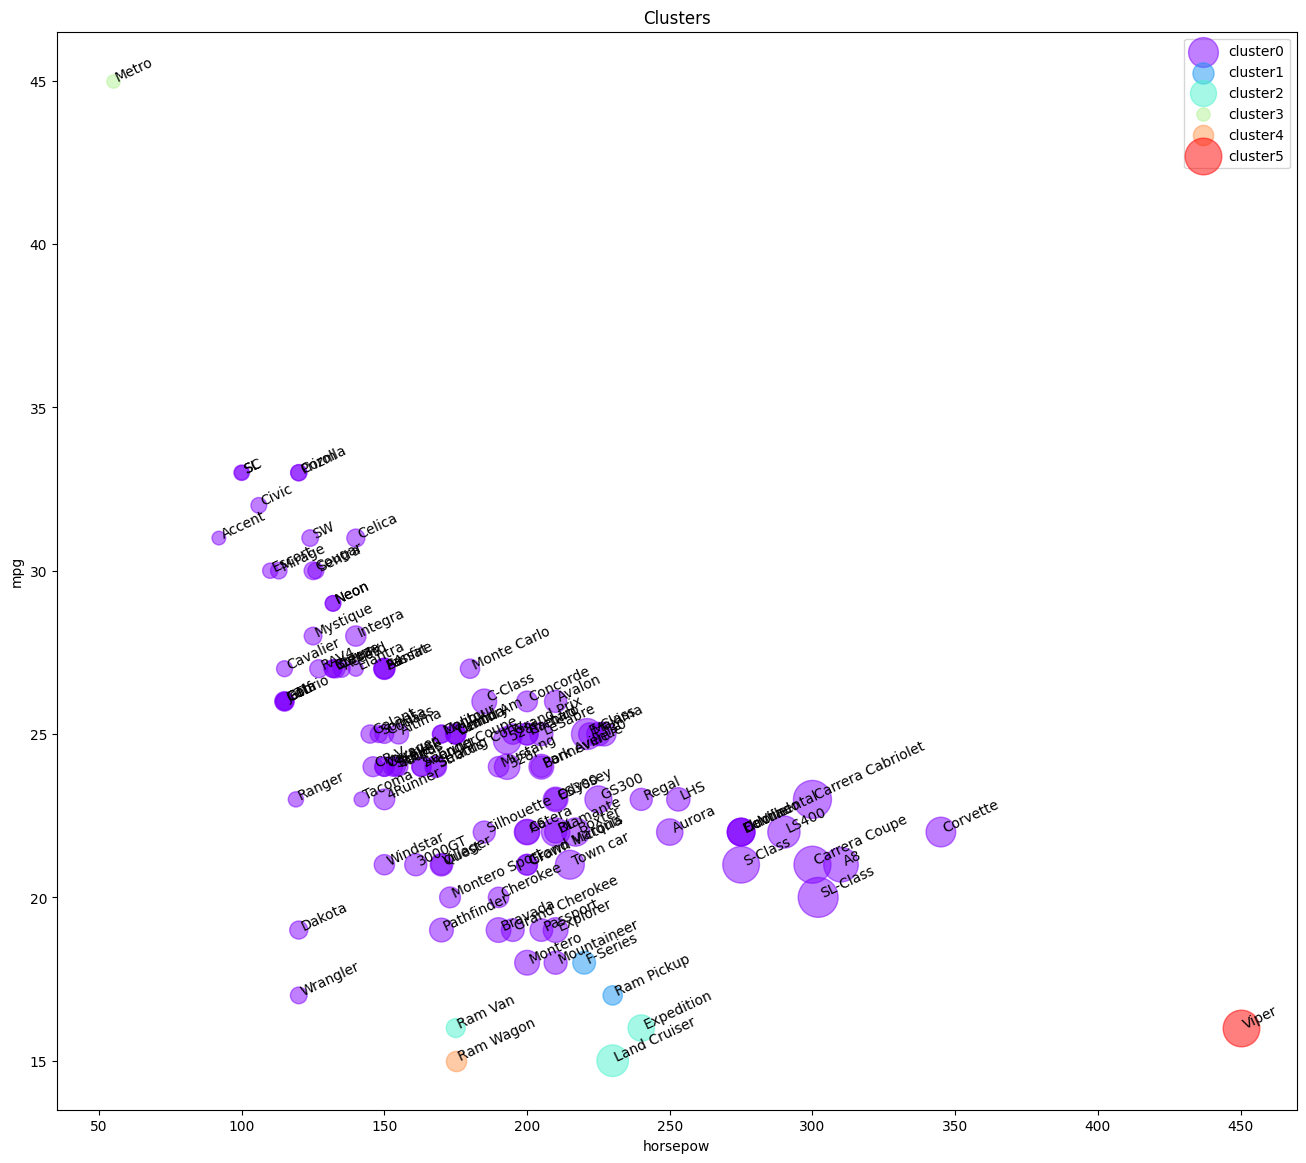

In [ ]:
# Mengimpor colormap 'rainbow' untuk memberikan warna berbeda pada setiap kluster
import matplotlib.cm as cm

# Menentukan jumlah kluster berdasarkan label yang dihasilkan oleh AgglomerativeClustering
n_clusters = max(agglom_sing.labels_) + 1

# Membuat array warna untuk setiap kluster menggunakan colormap 'rainbow'
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label kluster dari 0 hingga jumlah kluster-1
cluster_labels = list(range(0, n_clusters))

# Membuat figure dengan ukuran 16x14 inci untuk plot
plt.figure(figsize=(16,14))

# Iterasi untuk setiap kluster, warna, dan label kluster
for color, label in zip(colors, cluster_labels):
    # Memilih data subset berdasarkan label kluster
    subset = pdf[pdf['cluster_'] == label]

    # Menambahkan teks model mobil untuk setiap titik data dalam subset
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)

    # Menampilkan titik data dalam subset dengan warna dan ukuran berdasarkan harga
    plt.scatter(subset.horsepow, subset.mpg, subset.price*10, c=color, label='cluster' + str(label), alpha=0.5)

# Menambahkan legenda untuk membedakan kluster
plt.legend()

# Menambahkan judul dan label pada sumbu X dan Y
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [ ]:
# Mengelompokkan data berdasarkan kolom 'cluster_' (klaster) dan 'type' (tipe kendaraan)
# Kemudian menghitung jumlah data dalam setiap grup yang terbentuk (jumlah kendaraan)
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [ ]:
# Mengonversi kolom-kolom yang digunakan untuk mean menjadi numeric, dengan error='coerce' untuk mengubah non-numeric menjadi NaN
pdf[['horsepow', 'engine_s', 'mpg', 'price']] = pdf[['horsepow', 'engine_s', 'mpg', 'price']].apply(pd.to_numeric, errors='coerce')

# Mengelompokkan data berdasarkan dua kolom yaitu 'cluster_' dan 'type'
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()

# Menampilkan hasilnya
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

<ipython-input-75-7f34f10a4fc5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-75-7f34f10a4fc5>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

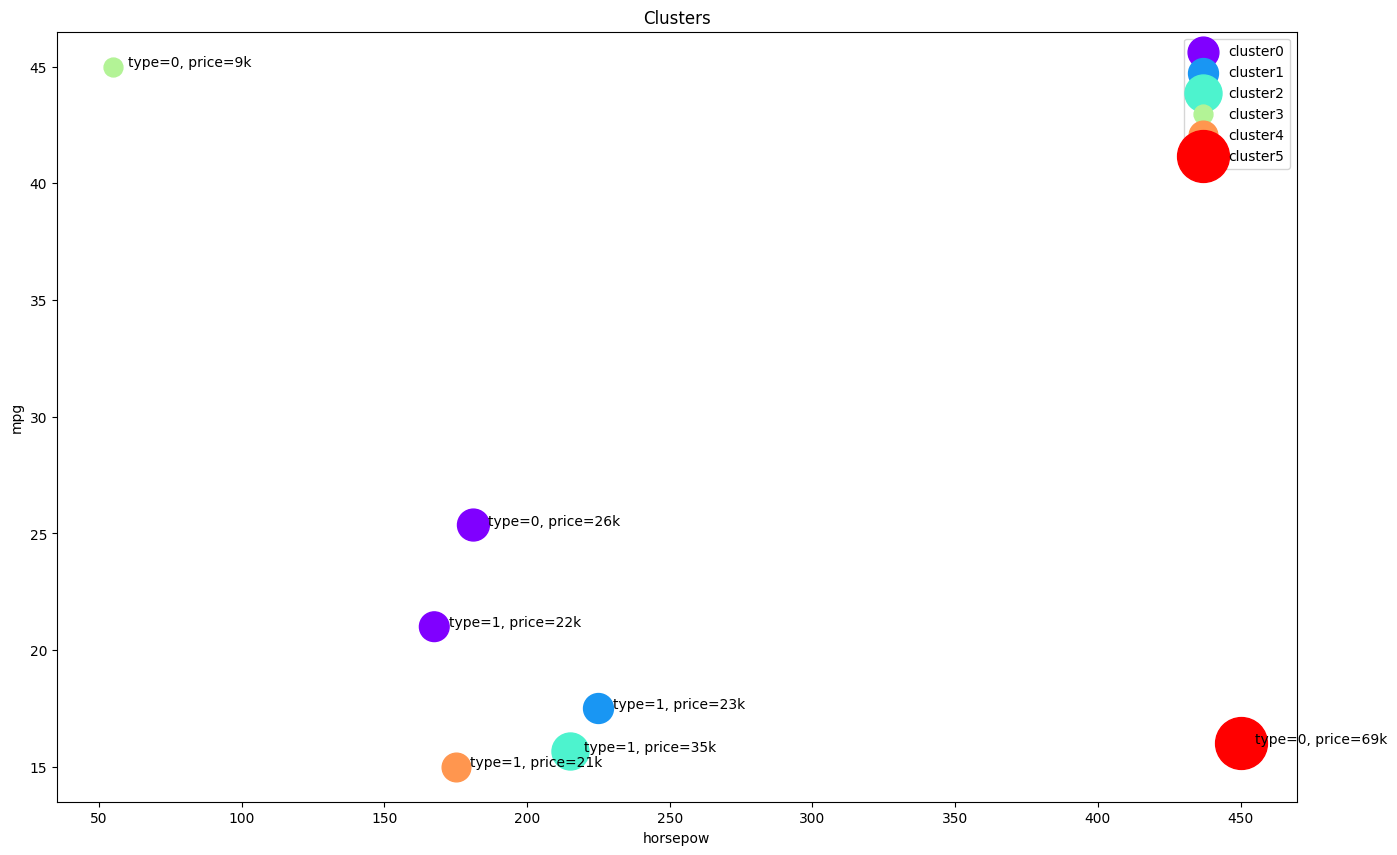

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

## 2. Complete Linkage

In [ ]:
import pylab
import scipy.cluster.hierarchy

# Melakukan hierarchical clustering menggunakan metode complete linkage pada matriks jarak
C = hierarchy.linkage(D, 'complete')

<ipython-input-76-4660667b2558>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  C = hierarchy.linkage(D, 'complete')


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Jika jarak antara dua cluster lebih besar dari 3, mereka tidak akan digabungkan.
max_d = 3
clusters = fcluster(C, max_d, criterion='distance')

# Output the clusters
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

Plotting Dendogram

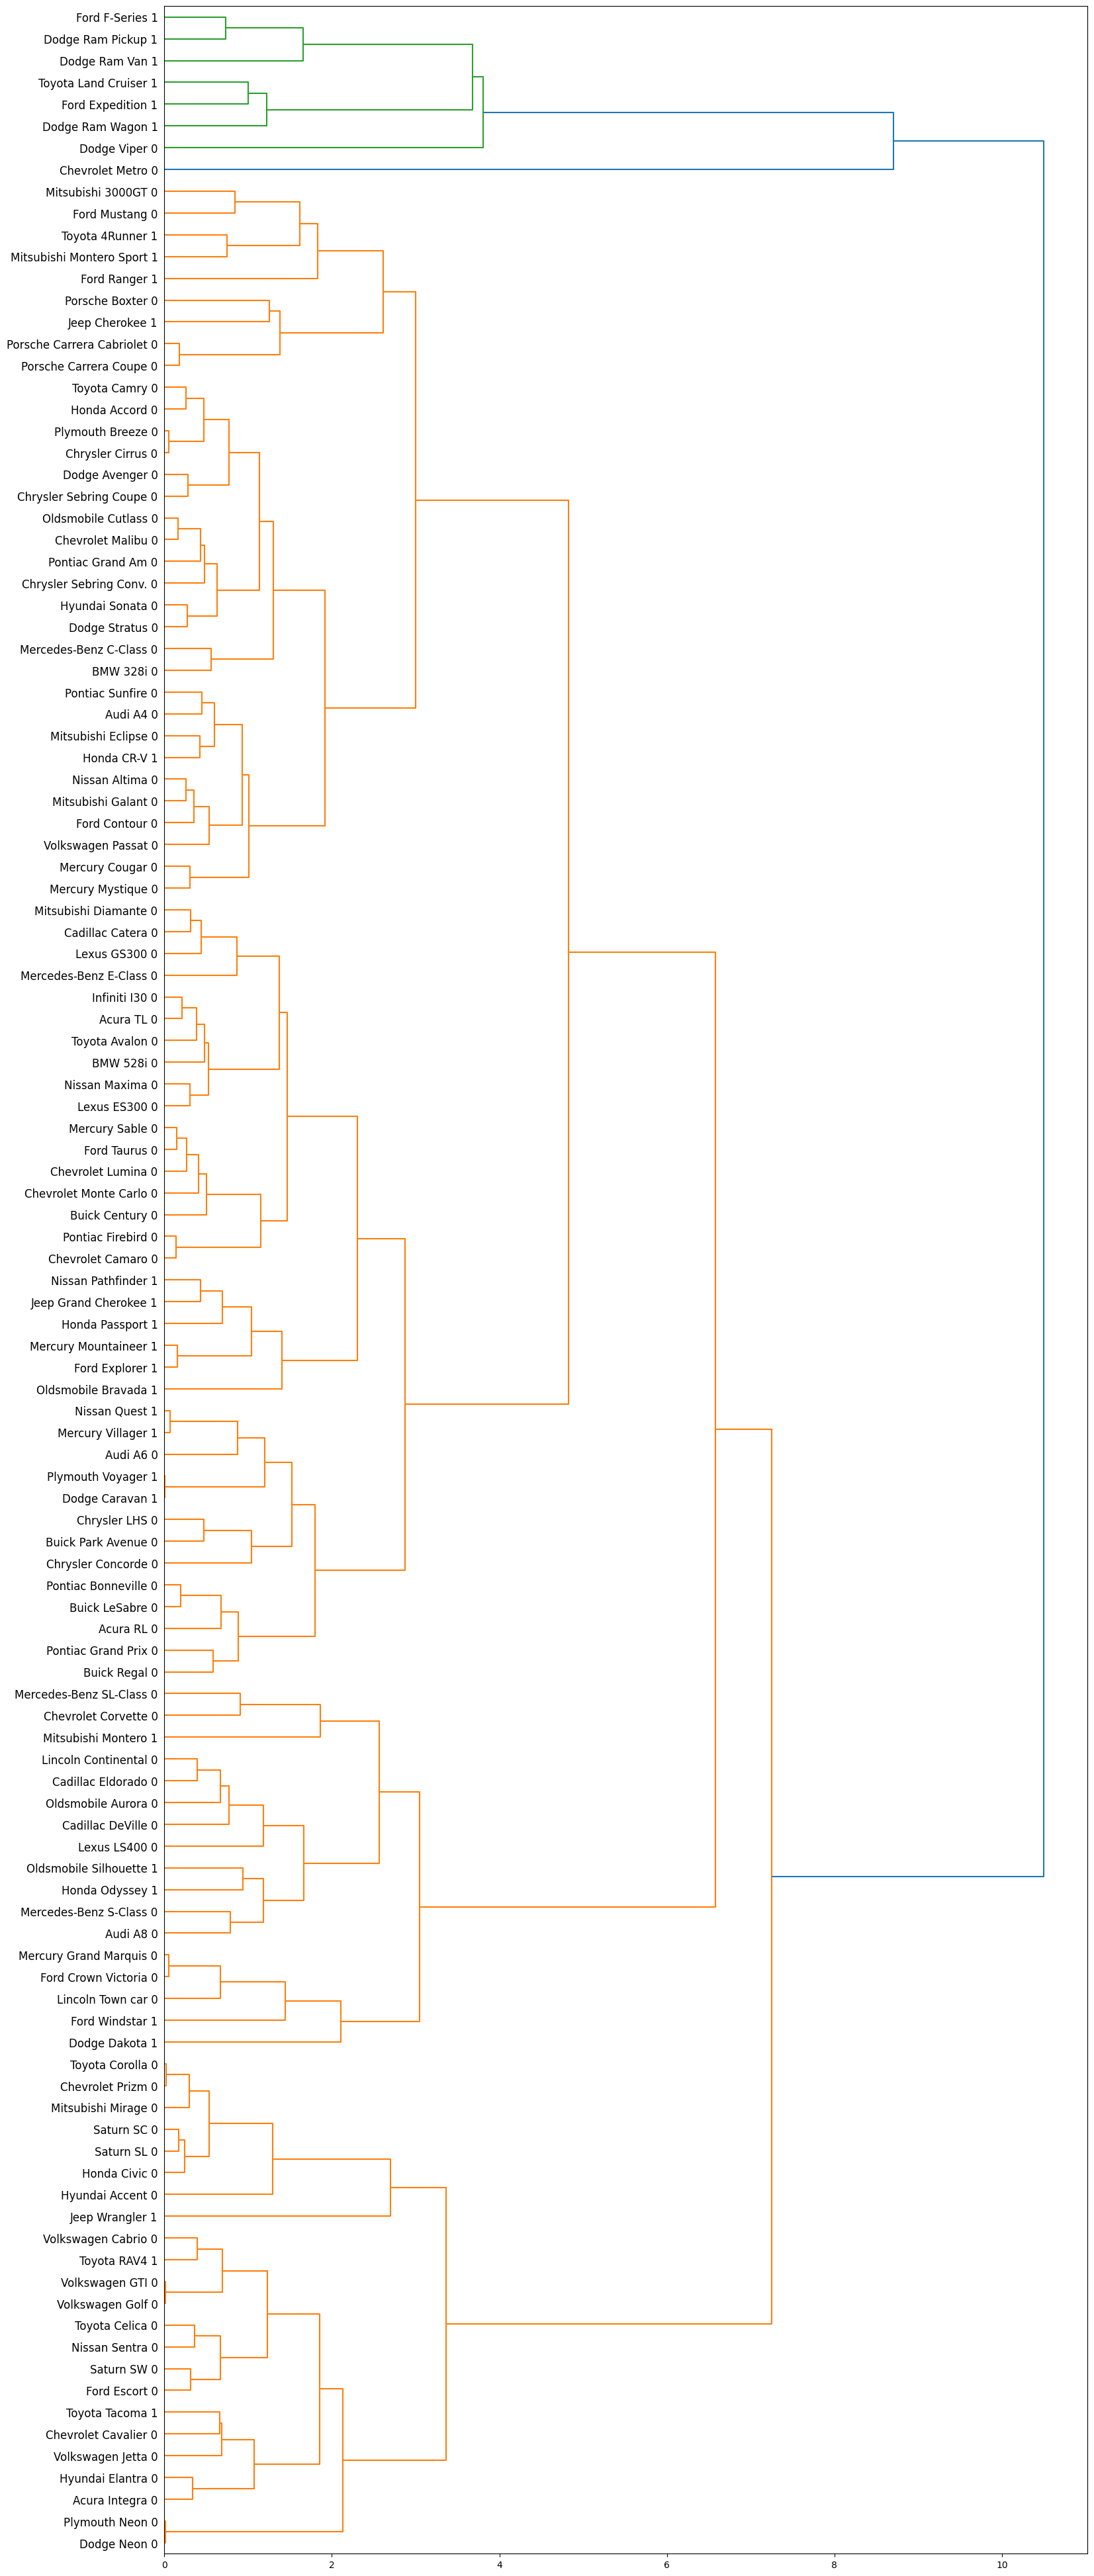

In [ ]:
# Membuat sebuah figure baru untuk plot dendrogram dengan ukuran 18 x 50 inci
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk menghasilkan label pada setiap daun (leaf) dalam dendrogram
# Label yang ditampilkan akan berisi informasi tentang 'manufact', 'model', dan 'type'
# Berdasarkan data yang ada dalam dataframe 'pdf'
def llf(id):
    # Format label: [manufact_name model_name type_as_integer]
    return ('%s %s %s' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id]))))

# Membuat dan menggambar dendrogram berdasarkan hasil linkage (Z)
# Dengan menampilkan label pada setiap daun yang dihasilkan oleh fungsi 'llf'
leaf_rotation=0  # artinya label tidak diputar, tetap horizontal
leaf_font_size=12  # Mengatur ukuran font label pada daun
orientation='right'  # Mengatur orientasi dendrogram agar berkembang dari kiri ke kanan

dendro = hierarchy.dendrogram(
    C,
    leaf_label_func=llf,  # Fungsi untuk menghasilkan label daun
    leaf_rotation=leaf_rotation,  # Fungsi memutar label, tetap horizontal
    leaf_font_size=leaf_font_size,  # Ukuran font untuk label
    orientation=orientation  # Orientasi dendrogram dari kiri ke kanan
)

In [ ]:
# Menghitung matriks jarak antara setiap pasangan titik dalam feature_mtx
# distance_matrix adalah fungsi dari scipy.spatial yang digunakan untuk menghitung jarak antar dua himpunan titik
# Dalam hal ini, kita menghitung jarak Euclidean antara setiap titik di feature_mtx dengan semua titik lainnya di feature_mtx
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Menampilkan matriks jarak yang dihitung
# Matriks ini berisi nilai jarak antar setiap pasangan titik data di feature_mtx
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [ ]:
# Membuat objek AgglomerativeClustering dengan parameter n_clusters = 6 dan linkage = 'complete'
# n_clusters = 6 menunjukkan bahwa kita ingin membagi data ke dalam 6 cluster
# linkage = 'complete' berarti kita menggunakan metode linkage lengkap (complete linkage) dalam penggabungan kluster
# Metode 'complete' mengukur jarak antara dua kluster berdasarkan jarak terjauh antara elemen-elemen di kedua kluster tersebut
agglom_comp = AgglomerativeClustering(n_clusters=6, linkage='complete')

# Melatih model clustering pada data yang ada di feature_mtx
# fit() digunakan untuk menyesuaikan model pada data dan menghasilkan hasil clustering
# feature_mtx adalah matriks fitur yang berisi data yang akan dikelompokkan
agglom_comp.fit(feature_mtx)

# Menampilkan label kluster untuk setiap titik data
# labels_ berisi hasil kluster yang dihasilkan oleh algoritma Agglomerative Clustering
# Setiap titik data akan diberikan label kluster sesuai dengan kluster tempat titik tersebut berada
agglom_comp.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [ ]:
# Menambahkan kolom baru 'cluster_' pada DataFrame 'pdf' yang berisi label kluster
# Label kluster ini diperoleh dari hasil klasterisasi menggunakan model agglomerative clustering
# agglom.labels_ berisi array label kluster untuk setiap titik data dalam feature_mtx
# Setiap titik data akan diberikan label sesuai dengan kluster yang ditempatinya, dan nilai label ini ditambahkan ke dalam DataFrame pdf
pdf['cluster_'] = agglom_comp.labels_

# Menampilkan 5 baris pertama dari DataFrame 'pdf' untuk melihat hasil klasterisasi
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.15,0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,2


<ipython-input-82-03b155e2291e>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, subset.price*10, c=color, label='cluster' + str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

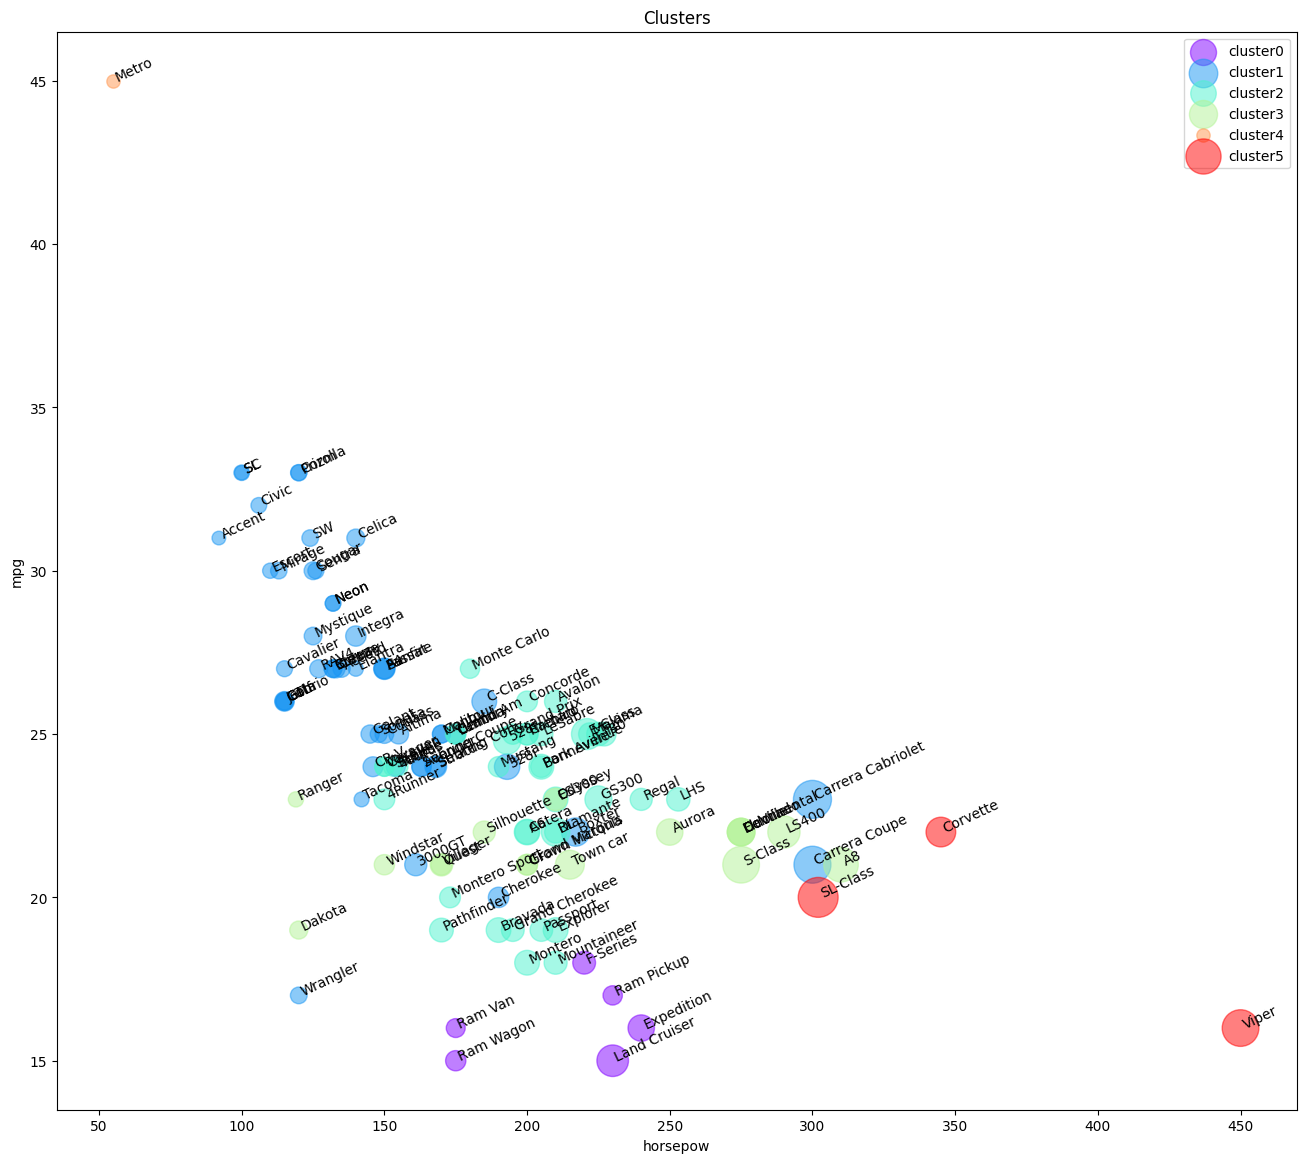

In [ ]:
# Mengimpor colormap 'rainbow' untuk memberikan warna berbeda pada setiap kluster
import matplotlib.cm as cm

# Menentukan jumlah kluster berdasarkan label yang dihasilkan oleh AgglomerativeClustering
n_clusters = max(agglom_comp.labels_) + 1

# Membuat array warna untuk setiap kluster menggunakan colormap 'rainbow'
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label kluster dari 0 hingga jumlah kluster-1
cluster_labels = list(range(0, n_clusters))

# Membuat figure dengan ukuran 16x14 inci untuk plot
plt.figure(figsize=(16,14))

# Iterasi untuk setiap kluster, warna, dan label kluster
for color, label in zip(colors, cluster_labels):
    # Memilih data subset berdasarkan label kluster
    subset = pdf[pdf['cluster_'] == label]

    # Menambahkan teks model mobil untuk setiap titik data dalam subset
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)

    # Menampilkan titik data dalam subset dengan warna dan ukuran berdasarkan harga
    plt.scatter(subset.horsepow, subset.mpg, subset.price*10, c=color, label='cluster' + str(label), alpha=0.5)

# Menambahkan legenda untuk membedakan kluster
plt.legend()

# Menambahkan judul dan label pada sumbu X dan Y
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [ ]:
# Mengelompokkan data berdasarkan kolom 'cluster_' (klaster) dan 'type' (tipe kendaraan)
# Kemudian menghitung jumlah data dalam setiap grup yang terbentuk (jumlah kendaraan)
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [ ]:
# Mengonversi kolom-kolom yang digunakan untuk mean menjadi numeric, dengan error='coerce' untuk mengubah non-numeric menjadi NaN
pdf[['horsepow', 'engine_s', 'mpg', 'price']] = pdf[['horsepow', 'engine_s', 'mpg', 'price']].apply(pd.to_numeric, errors='coerce')

# Mengelompokkan data berdasarkan dua kolom yaitu 'cluster_' dan 'type'
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()

# Menampilkan hasilnya
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

<ipython-input-85-7f34f10a4fc5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-85-7f34f10a4fc5>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

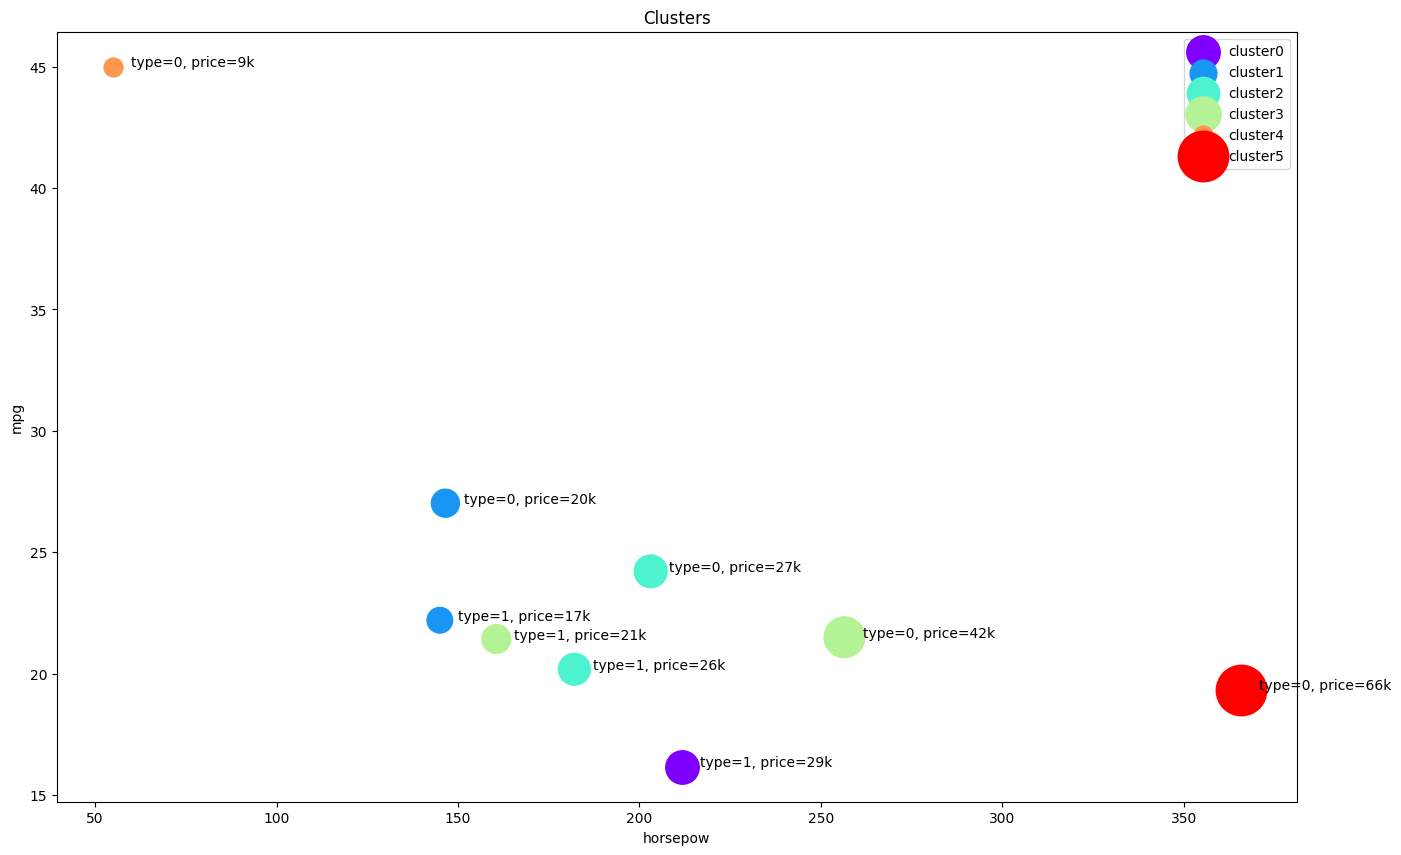

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

# 3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset iris! Jelaskan perbedaannya!

## Preparation

Import Dataset

In [ ]:
# Memuat dataset
from sklearn.datasets import load_iris
iris = load_iris()
print("Shape of Dataset", iris.data.shape)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = iris_df['target'].map({i: name for i, name in enumerate(iris.target_names)})
display(iris_df.head(5))

Shape of Dataset (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Cleaning Data

In [ ]:
# Data Cleaning
print("Shape of dataset before cleaning: ", iris_df.size)

Shape of dataset before cleaning:  900


In [ ]:
# Mengonversi kolom yang relevan menjadi tipe data numerik
# (Jika ada kolom yang belum bertipe numerik, lakukan konversi)
columns_to_convert = iris.feature_names  # Daftar nama fitur
columns_existing = [col for col in columns_to_convert if col in iris_df.columns]  # Memastikan kolom ada di DataFrame

# Mengonversi kolom-kolom yang sesuai menggunakan pd.to_numeric
iris_df[columns_existing] = iris_df[columns_existing].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang memiliki nilai kosong (NaN)
iris_df = iris_df.dropna()

# Mereset indeks setelah penghapusan baris
iris_df = iris_df.reset_index(drop=True)

# Menampilkan ukuran dataset setelah pembersihan
print("Ukuran Dataset setelah pembersihan:", iris_df.shape)

# Menampilkan 5 baris pertama dari DataFrame yang sudah bersih
iris_df.head(5)

Ukuran Dataset setelah pembersihan: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# Feature Selection
# Memilih fitur numerik untuk clustering
featureset = iris_df[iris.feature_names]

# Normalisasi Data
from sklearn.preprocessing import MinMaxScaler

# Mengubah DataFrame ke dalam array numpy
x = featureset.values

# Membuat objek MinMaxScaler untuk normalisasi data
min_max_scaler = MinMaxScaler()

# Melakukan normalisasi data
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan 5 baris pertama dari data yang telah dinormalisasi
print("Data setelah normalisasi (5 baris pertama):")
print(feature_mtx[0:5])

# Clustering dengan SciPy
import numpy as np
import scipy

# Mendapatkan panjang dataset
leng = feature_mtx.shape[0]

# Membuat matriks kosong untuk menyimpan jarak antar data
D = np.zeros((leng, leng))

# Menghitung jarak Euclidean antara semua pasangan data
for i in range(leng):
    for j in range(leng):
        # Matriks D berisi jarak Euclidean antara semua pasangan data
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

# Menampilkan ukuran matriks jarak
print("\nUkuran matriks jarak (D):", D.shape)

Data setelah normalisasi (5 baris pertama):
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]

Ukuran matriks jarak (D): (150, 150)


## 1. Single Linkage

<ipython-input-159-02b7916c03f9>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = hierarchy.linkage(D, method='single', metric='euclidean')


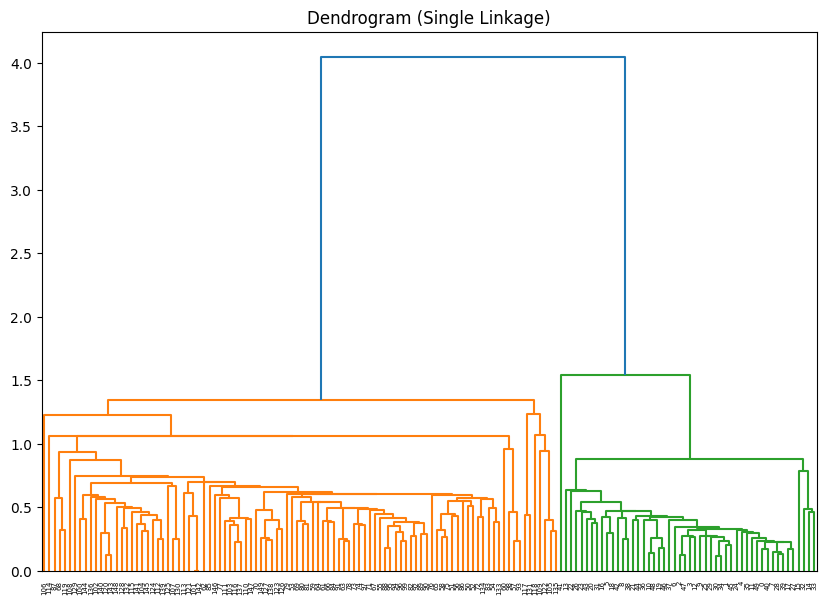

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Single Linkage menggunakan matriks jarak D
Z_single = hierarchy.linkage(D, method='single', metric='euclidean')

# Membuat dendrogram untuk Single Linkage
plt.figure(figsize=(10, 7))
dn_single = hierarchy.dendrogram(Z_single)
plt.title("Dendrogram (Single Linkage)")
plt.show()

In [ ]:
# Menghitung matriks jarak antara setiap pasangan titik dalam feature_mtx
# distance_matrix adalah fungsi dari scipy.spatial yang digunakan untuk menghitung jarak antar dua himpunan titik
# Dalam hal ini, kita menghitung jarak Euclidean antara setiap titik di feature_mtx dengan semua titik lainnya di feature_mtx
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Menampilkan matriks jarak yang dihitung
# Matriks ini berisi nilai jarak antar setiap pasangan titik data di feature_mtx
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


In [ ]:
# Membuat objek AgglomerativeClustering dengan parameter n_clusters = 6 dan linkage = 'single'
# n_clusters = 6 menunjukkan bahwa kita ingin membagi data ke dalam 6 cluster
# linkage = 'complete' berarti kita menggunakan metode linkage lengkap (single linkage) dalam penggabungan kluster
# Metode 'single' mengukur jarak antara dua kluster berdasarkan jarak terjauh antara elemen-elemen di kedua kluster tersebut
agglom_sing = AgglomerativeClustering(n_clusters=6, linkage='single')

# Melatih model clustering pada data yang ada di feature_mtx
# fit() digunakan untuk menyesuaikan model pada data dan menghasilkan hasil clustering
# feature_mtx adalah matriks fitur yang berisi data yang akan dikelompokkan
agglom_sing.fit(feature_mtx)

# Menampilkan label kluster untuk setiap titik data
# labels_ berisi hasil kluster yang dihasilkan oleh algoritma Agglomerative Clustering
# Setiap titik data akan diberikan label kluster sesuai dengan kluster tempat titik tersebut berada
agglom_sing.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Menambahkan kolom baru 'cluster_' pada DataFrame 'pdf' yang berisi label kluster
# Label kluster ini diperoleh dari hasil klasterisasi menggunakan model agglomerative clustering
# agglom.labels_ berisi array label kluster untuk setiap titik data dalam feature_mtx
# Setiap titik data akan diberikan label sesuai dengan kluster yang ditempatinya, dan nilai label ini ditambahkan ke dalam DataFrame pdf
iris_df['cluster_'] = agglom_sing.labels_

# Menampilkan 5 baris pertama dari DataFrame 'pdf' untuk melihat hasil klasterisasi
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,cluster_
0,5.1,3.5,1.4,0.2,0,setosa,2
1,4.9,3.0,1.4,0.2,0,setosa,2
2,4.7,3.2,1.3,0.2,0,setosa,2
3,4.6,3.1,1.5,0.2,0,setosa,2
4,5.0,3.6,1.4,0.2,0,setosa,2


<ipython-input-164-0eb494de0c54>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


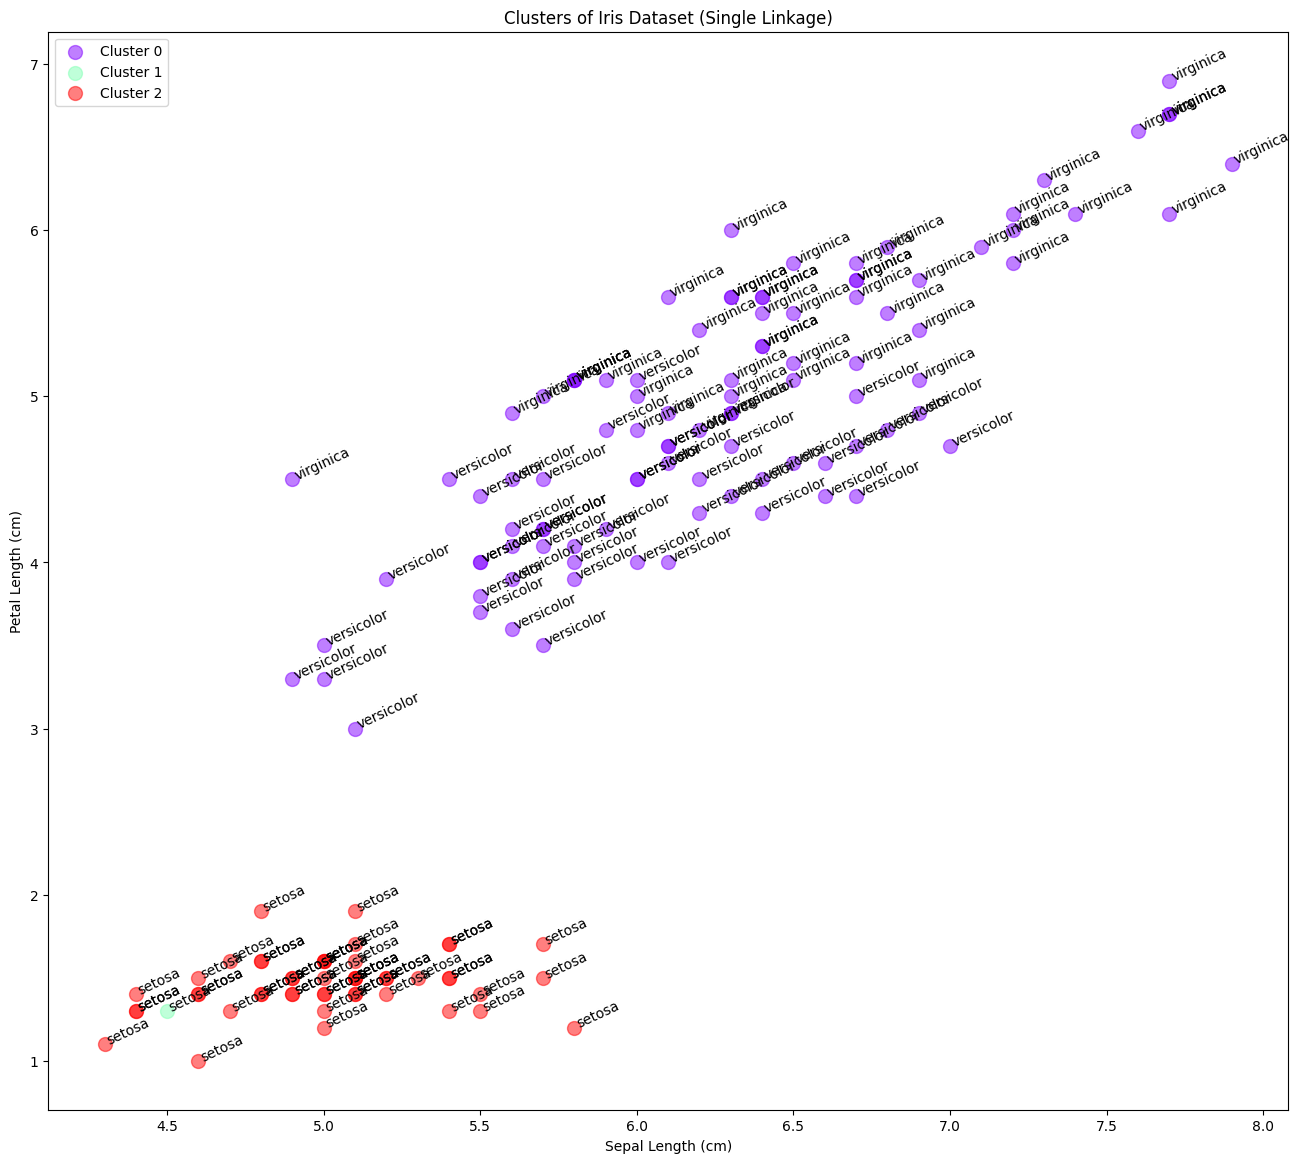

In [ ]:
# Mengimpor colormap 'rainbow' untuk memberikan warna berbeda pada setiap kluster
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Melakukan Agglomerative Clustering dengan metode Single Linkage
agglom_clusters = AgglomerativeClustering(n_clusters=3, linkage='single').fit(feature_mtx)

# Menambahkan label kluster ke DataFrame Iris
iris_df['cluster_'] = agglom_clusters.labels_

# Menentukan jumlah kluster berdasarkan label yang dihasilkan
n_clusters = max(iris_df['cluster_']) + 1

# Membuat array warna untuk setiap kluster menggunakan colormap 'rainbow'
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label kluster dari 0 hingga jumlah kluster-1
cluster_labels = list(range(0, n_clusters))

# Membuat figure untuk plot
plt.figure(figsize=(16, 14))

# Iterasi untuk setiap kluster, warna, dan label kluster
for color, label in zip(colors, cluster_labels):
    # Memilih data subset berdasarkan label kluster
    subset = iris_df[iris_df['cluster_'] == label]

    # Menambahkan teks nama spesies untuk setiap titik data dalam subset
    # Use subset.index to iterate through the subset's index
    for i in subset.index:
        plt.text(subset.loc[i, 'sepal length (cm)'],  # Sepal Length using column name
                 subset.loc[i, 'petal length (cm)'],  # Petal Length using column name
                 str(subset.loc[i, 'target_names']),  # Access target_names using loc
                 rotation=25)

    # Menampilkan titik data dalam subset dengan warna berbeda untuk setiap kluster
    plt.scatter(
        subset.iloc[:, 0],  # Fitur ke-0 (sepal length)
        subset.iloc[:, 2],  # Fitur ke-2 (petal length)
        s=100,              # Ukuran titik
        c=color,            # Warna berdasarkan kluster
        label='Cluster ' + str(label),
        alpha=0.5
    )

# Menambahkan legenda untuk membedakan kluster
plt.legend()

# Menambahkan judul dan label pada sumbu X dan Y
plt.title('Clusters of Iris Dataset (Single Linkage)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

# Menampilkan plot
plt.show()

In [ ]:
# Mengelompokkan data berdasarkan kolom 'cluster_' (klaster) dan 'target_names' (tipe spesies)
# Kemudian menghitung jumlah data dalam setiap grup yang terbentuk (jumlah bunga)
iris_df.groupby(['cluster_', 'target_names'])['cluster_'].count()

cluster_  target_names
0         setosa          50
1         versicolor      50
          virginica       17
2         virginica       33
Name: cluster_, dtype: int64

In [ ]:
# Mengonversi kolom yang digunakan untuk mean menjadi numeric,
# dengan errors='coerce' untuk mengubah non-numeric menjadi NaN
iris_df[iris.feature_names] = iris_df[iris.feature_names].apply(pd.to_numeric, errors='coerce')

# Mengelompokkan data berdasarkan 'cluster_' dan 'target_names' (species)
agg_iris = iris_df.groupby(['cluster_', 'target_names'])[iris.feature_names].mean()

# Menampilkan hasilnya
agg_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ target_names                                                           
0        setosa                 5.006000          3.428000           1.462000   
1        versicolor             5.936000          2.770000           4.260000   
         virginica              5.994118          2.694118           5.058824   
2        virginica              6.893939          3.118182           5.806061   

                       petal width (cm)  
cluster_ target_names                    
0        setosa                0.246000  
1        versicolor            1.326000  
         virginica             1.817647  
2        virginica             2.133333

<ipython-input-133-c1f61f424c06>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0] + 0.1,  # Menyesuaikan posisi teks (panjang sepal)
<ipython-input-133-c1f61f424c06>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  subset.loc[i][2] + 0.1,  # Menyesuaikan posisi teks (panjang petal)
<ipython-input-133-c1f61f424c06>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to

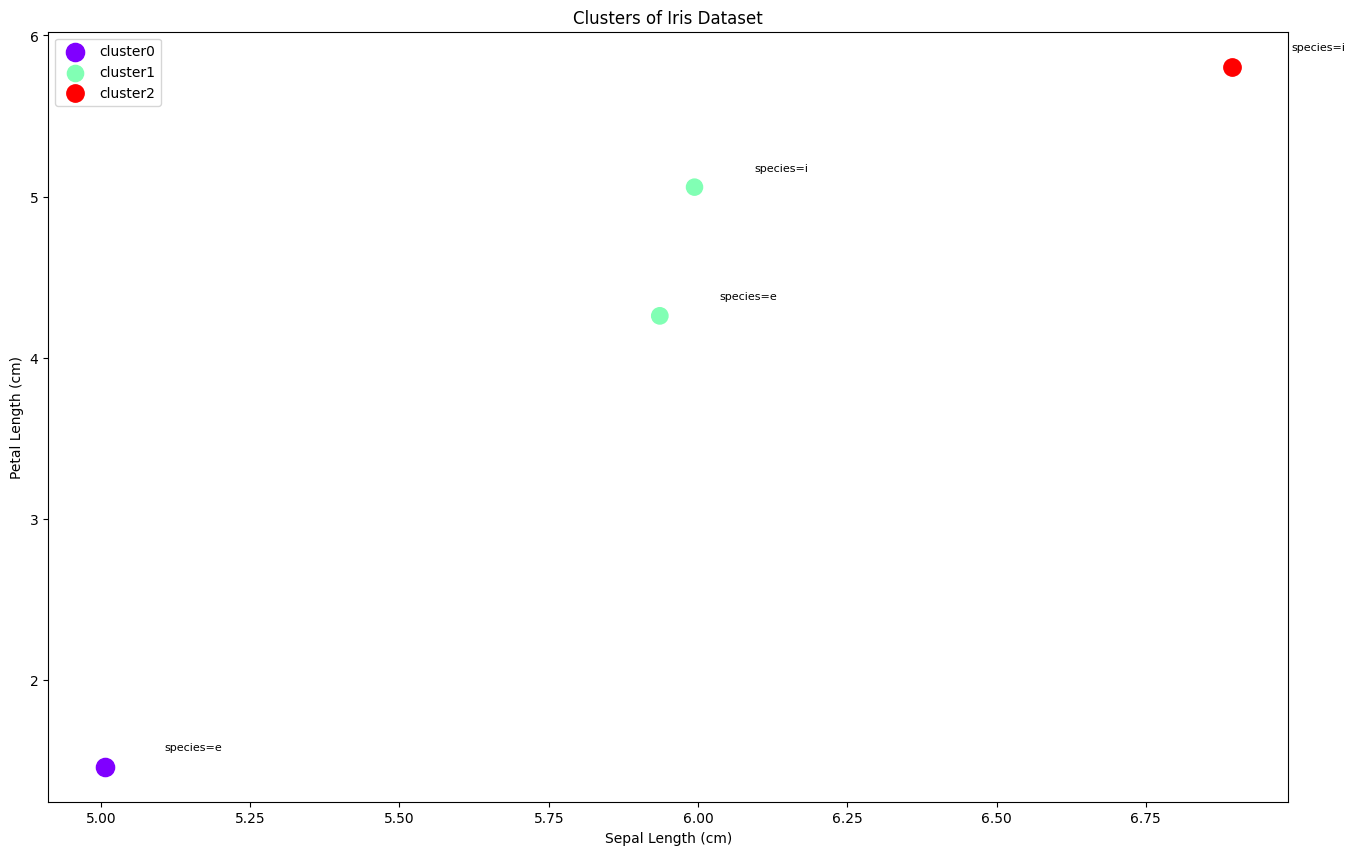

In [ ]:
# Diasumsikan agg_iris dan colors sudah didefinisikan sebelumnya

plt.figure(figsize=(16, 10))
for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]
    for i in subset.index:
        # Menambahkan teks nama spesies di setiap titik
        plt.text(subset.loc[i][0] + 0.1,  # Menyesuaikan posisi teks (panjang sepal)
                 subset.loc[i][2] + 0.1,  # Menyesuaikan posisi teks (panjang petal)
                 'species=' + str(i[1]),  # Menampilkan nama spesies
                 fontdict={'fontsize': 8})
    # Membuat scatter plot untuk setiap cluster
    plt.scatter(subset['sepal length (cm)'],
                subset['petal length (cm)'],
                s=subset['sepal width (cm)'] * 50,
                c=color,
                label='cluster' + str(label))

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

## 2. Average Linkage

<ipython-input-165-5b8d6c4e4ddb>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_average = hierarchy.linkage(D, method='average', metric='euclidean')


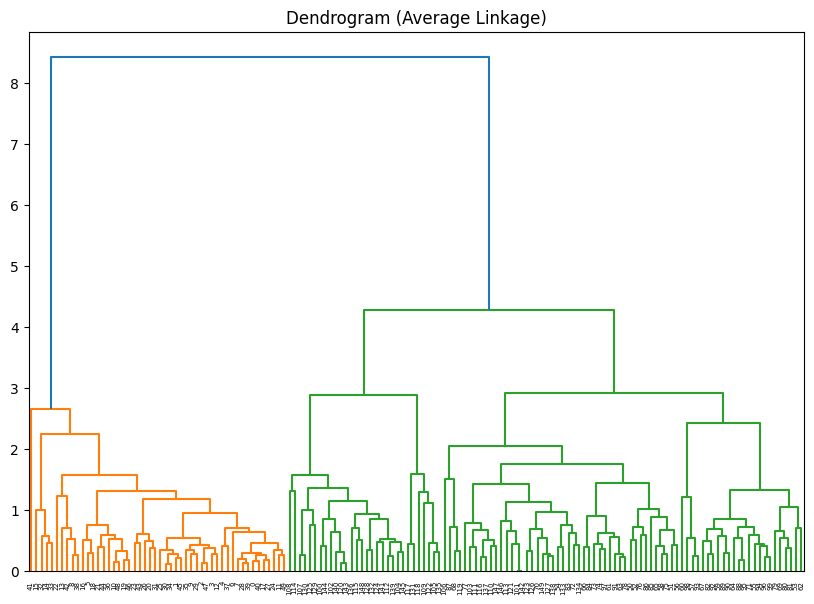

In [ ]:
# Average Linkage menggunakan matriks jarak D
Z_average = hierarchy.linkage(D, method='average', metric='euclidean')

# Membuat dendrogram untuk Average Linkage (dengan matriks jarak)
plt.figure(figsize=(10, 7))
dn_average = hierarchy.dendrogram(Z_average)
plt.title("Dendrogram (Average Linkage)")
plt.show()

In [ ]:
# Menghitung matriks jarak antara setiap pasangan titik dalam feature_mtx
# distance_matrix adalah fungsi dari scipy.spatial yang digunakan untuk menghitung jarak antar dua himpunan titik
# Dalam hal ini, kita menghitung jarak Euclidean antara setiap titik di feature_mtx dengan semua titik lainnya di feature_mtx
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Menampilkan matriks jarak yang dihitung
# Matriks ini berisi nilai jarak antar setiap pasangan titik data di feature_mtx
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


In [ ]:
# Membuat objek AgglomerativeClustering dengan parameter n_clusters = 6 dan linkage = 'single'
# n_clusters = 6 menunjukkan bahwa kita ingin membagi data ke dalam 6 cluster
# linkage = 'complete' berarti kita menggunakan metode linkage lengkap (single linkage) dalam penggabungan kluster
# Metode 'single' mengukur jarak antara dua kluster berdasarkan jarak terjauh antara elemen-elemen di kedua kluster tersebut
agglom_avg = AgglomerativeClustering(n_clusters=6, linkage='average')

# Melatih model clustering pada data yang ada di feature_mtx
# fit() digunakan untuk menyesuaikan model pada data dan menghasilkan hasil clustering
# feature_mtx adalah matriks fitur yang berisi data yang akan dikelompokkan
agglom_avg.fit(feature_mtx)

# Menampilkan label kluster untuk setiap titik data
# labels_ berisi hasil kluster yang dihasilkan oleh algoritma Agglomerative Clustering
# Setiap titik data akan diberikan label kluster sesuai dengan kluster tempat titik tersebut berada
agglom_avg.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 1, 4, 1, 1, 1, 1, 2, 1, 4, 5,
       1, 4, 1, 4, 4, 1, 1, 5, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 5,
       1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4])

In [ ]:
# Menambahkan kolom baru 'cluster_' pada DataFrame 'pdf' yang berisi label kluster
# Label kluster ini diperoleh dari hasil klasterisasi menggunakan model agglomerative clustering
# agglom.labels_ berisi array label kluster untuk setiap titik data dalam feature_mtx
# Setiap titik data akan diberikan label sesuai dengan kluster yang ditempatinya, dan nilai label ini ditambahkan ke dalam DataFrame pdf
iris_df['cluster_'] = agglom_avg.labels_

# Menampilkan 5 baris pertama dari DataFrame 'pdf' untuk melihat hasil klasterisasi
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,cluster_
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


<ipython-input-169-c8f3a235cf3d>:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


Text(0, 0.5, 'Petal Length (cm)')

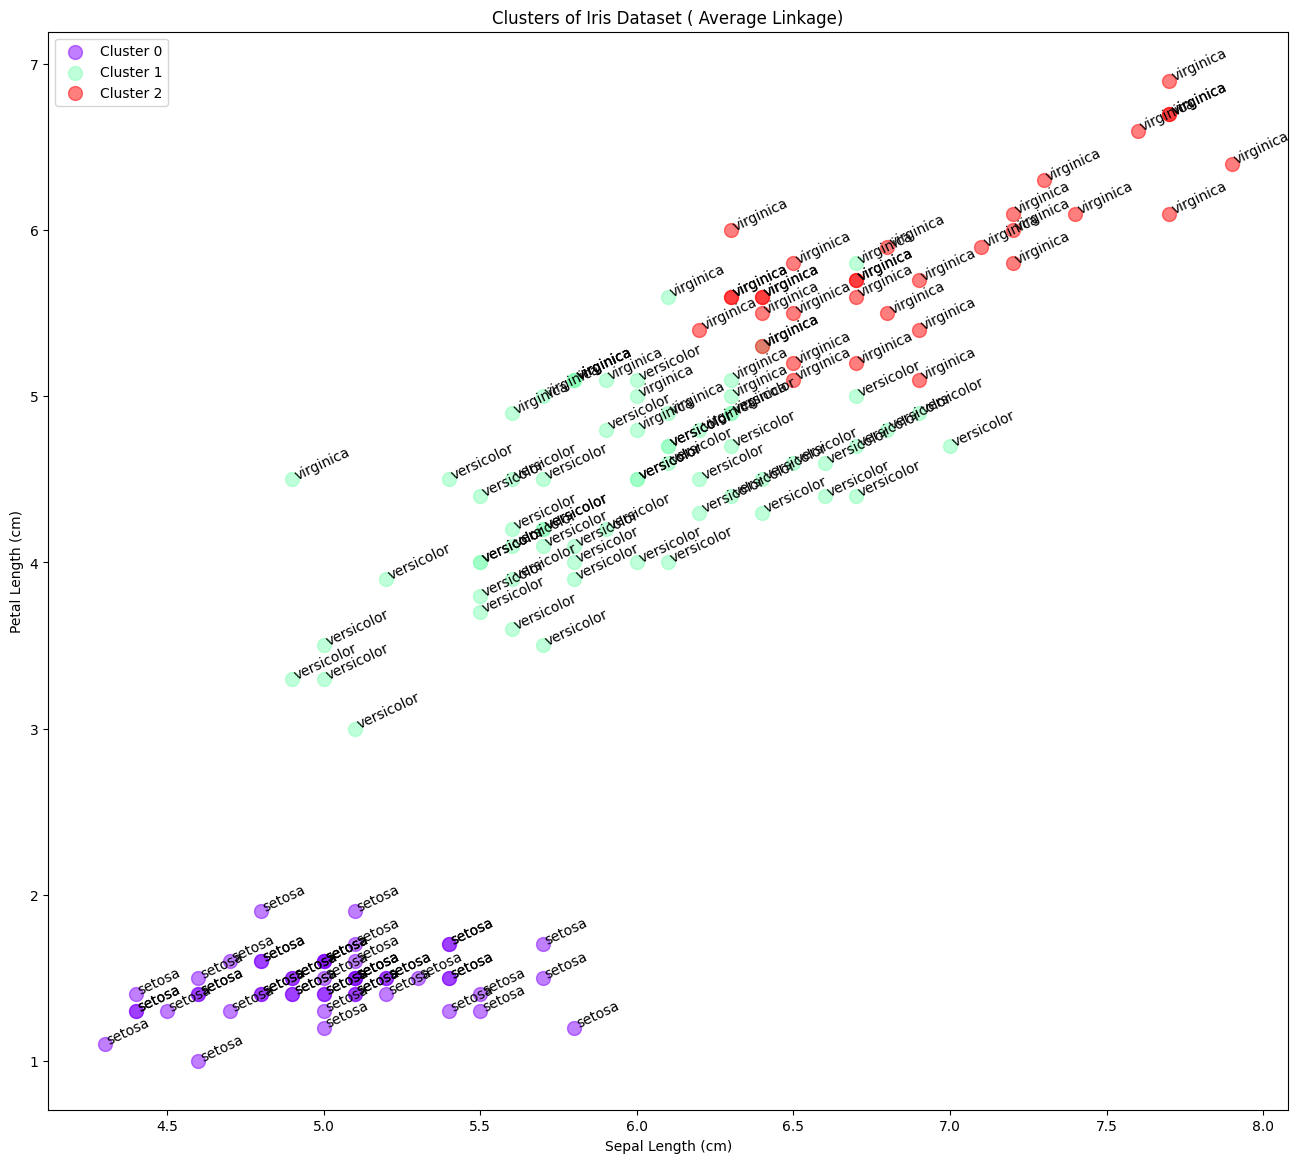

In [ ]:
# Mengimpor colormap 'rainbow' untuk memberikan warna berbeda pada setiap kluster
import matplotlib.cm as cm

# Misalkan kita sudah memiliki hasil clustering dari AgglomerativeClustering untuk dataset Iris
# Contoh, menggunakan fitur ke-0 dan ke-2 dari dataset Iris untuk visualisasi:
agglom_clusters = AgglomerativeClustering(n_clusters=3, linkage='average').fit(feature_mtx)

# Menambahkan label kluster ke DataFrame Iris
iris_df['cluster_'] = agglom_clusters.labels_

# Menentukan jumlah kluster berdasarkan label yang dihasilkan
n_clusters = max(iris_df['cluster_']) + 1

# Membuat array warna untuk setiap kluster menggunakan colormap 'rainbow'
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label kluster dari 0 hingga jumlah kluster-1
cluster_labels = list(range(0, n_clusters))

# Membuat figure untuk plot
plt.figure(figsize=(16, 14))

# Iterasi untuk setiap kluster, warna, dan label kluster
for color, label in zip(colors, cluster_labels):
    # Memilih data subset berdasarkan label kluster
    subset = iris_df[iris_df['cluster_'] == label]

    # Menambahkan teks nama spesies untuk setiap titik data dalam subset
    for i in subset.index:
        # Menggunakan .iloc dengan indeks relatif terhadap subset
        plt.text(subset.iloc[subset.index.get_loc(i), 0],
                 subset.iloc[subset.index.get_loc(i), 2],
                 str(subset['target_names'][i]),
                 rotation=25)

    # Menampilkan titik data dalam subset dengan warna berbeda untuk setiap kluster
    plt.scatter(
        subset.iloc[:, 0],  # Fitur ke-0 (sepal length)
        subset.iloc[:, 2],  # Fitur ke-2 (petal length)
        s=100,             # Ukuran titik
        c=color,           # Warna berdasarkan kluster
        label='Cluster ' + str(label),
        alpha=0.5
    )

# Menambahkan legenda untuk membedakan kluster
plt.legend()

# Menambahkan judul dan label pada sumbu X dan Y
plt.title('Clusters of Iris Dataset ( Average Linkage)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

In [ ]:
# Mengelompokkan data berdasarkan kolom 'cluster_' (klaster) dan 'target_names' (tipe spesies)
# Kemudian menghitung jumlah data dalam setiap grup yang terbentuk (jumlah bunga)
iris_df.groupby(['cluster_', 'target_names'])['cluster_'].count()

cluster_  target_names
0         setosa          50
1         versicolor      50
          virginica       17
2         virginica       33
Name: cluster_, dtype: int64

In [ ]:
# Mengonversi kolom yang digunakan untuk mean menjadi numeric,
# dengan errors='coerce' untuk mengubah non-numeric menjadi NaN
iris_df[iris.feature_names] = iris_df[iris.feature_names].apply(pd.to_numeric, errors='coerce')

# Mengelompokkan data berdasarkan 'cluster_' dan 'target_names' (species)
agg_iris = iris_df.groupby(['cluster_', 'target_names'])[iris.feature_names].mean()

# Menampilkan hasilnya
agg_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ target_names                                                           
0        setosa                 5.006000          3.428000           1.462000   
1        versicolor             5.936000          2.770000           4.260000   
         virginica              5.994118          2.694118           5.058824   
2        virginica              6.893939          3.118182           5.806061   

                       petal width (cm)  
cluster_ target_names                    
0        setosa                0.246000  
1        versicolor            1.326000  
         virginica             1.817647  
2        virginica             2.133333

<ipython-input-172-c1f61f424c06>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0] + 0.1,  # Menyesuaikan posisi teks (panjang sepal)
<ipython-input-172-c1f61f424c06>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  subset.loc[i][2] + 0.1,  # Menyesuaikan posisi teks (panjang petal)
<ipython-input-172-c1f61f424c06>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to

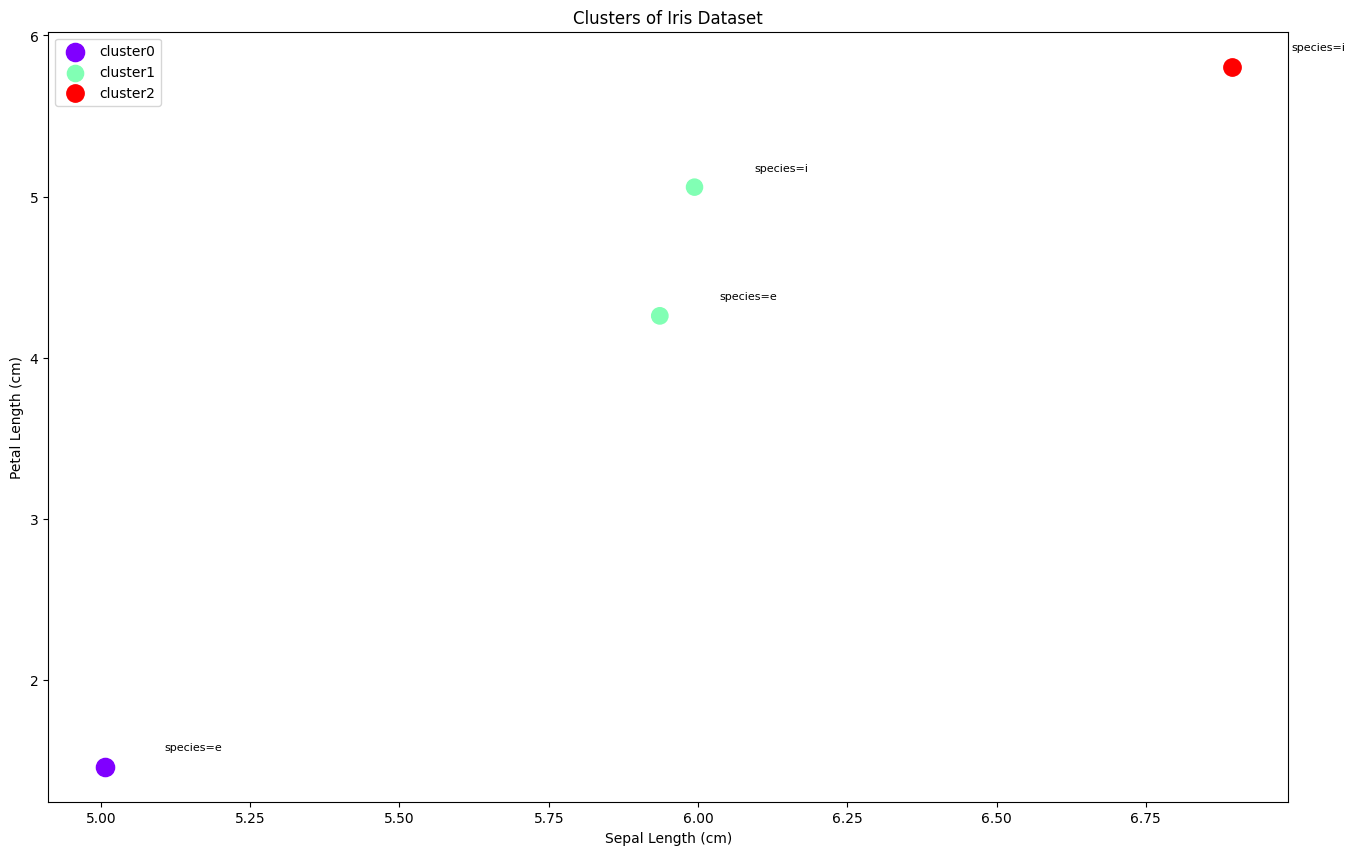

In [ ]:
# Diasumsikan agg_iris dan colors sudah didefinisikan sebelumnya

plt.figure(figsize=(16, 10))
for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]
    for i in subset.index:
        # Menambahkan teks nama spesies di setiap titik
        plt.text(subset.loc[i][0] + 0.1,  # Menyesuaikan posisi teks (panjang sepal)
                 subset.loc[i][2] + 0.1,  # Menyesuaikan posisi teks (panjang petal)
                 'species=' + str(i[1]),  # Menampilkan nama spesies
                 fontdict={'fontsize': 8})
    # Membuat scatter plot untuk setiap cluster
    plt.scatter(subset['sepal length (cm)'],
                subset['petal length (cm)'],
                s=subset['sepal width (cm)'] * 50,
                c=color,
                label='cluster' + str(label))

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

## 3. Complete Linkage

<ipython-input-155-d88b05f55dd7>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_complete = hierarchy.linkage(D, method='complete', metric='euclidean')


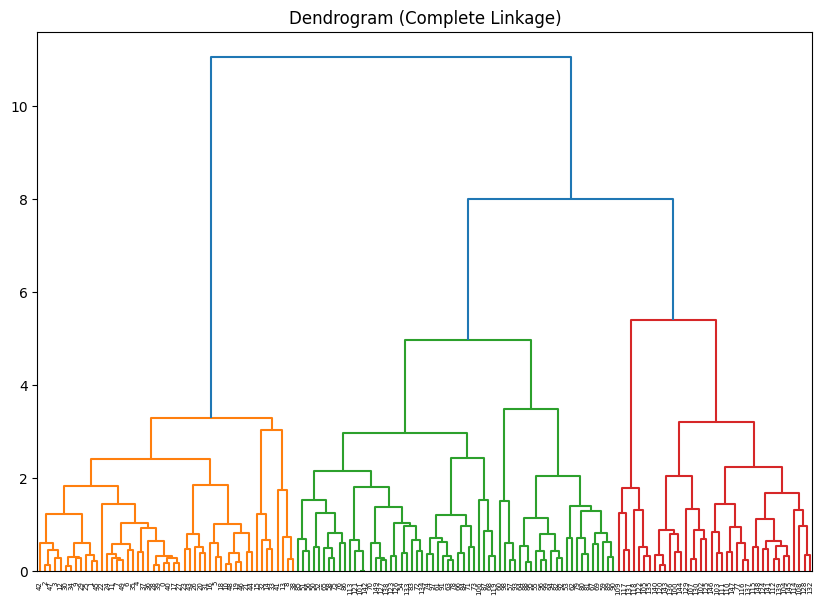

In [ ]:
# Complete Linkage menggunakan matriks jarak D
Z_complete = hierarchy.linkage(D, method='complete', metric='euclidean')

# Membuat dendrogram untuk Complete Linkage (dengan matriks jarak)
plt.figure(figsize=(10, 7))
dn_complete = hierarchy.dendrogram(Z_complete)
plt.title("Dendrogram (Complete Linkage)")
plt.show()

In [ ]:
# Menghitung matriks jarak antara setiap pasangan titik dalam feature_mtx
# distance_matrix adalah fungsi dari scipy.spatial yang digunakan untuk menghitung jarak antar dua himpunan titik
# Dalam hal ini, kita menghitung jarak Euclidean antara setiap titik di feature_mtx dengan semua titik lainnya di feature_mtx
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Menampilkan matriks jarak yang dihitung
# Matriks ini berisi nilai jarak antar setiap pasangan titik data di feature_mtx
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


In [ ]:
# Membuat objek AgglomerativeClustering dengan parameter n_clusters = 6 dan linkage = 'single'
# n_clusters = 6 menunjukkan bahwa kita ingin membagi data ke dalam 6 cluster
# linkage = 'complete' berarti kita menggunakan metode linkage lengkap (single linkage) dalam penggabungan kluster
# Metode 'single' mengukur jarak antara dua kluster berdasarkan jarak terjauh antara elemen-elemen di kedua kluster tersebut
agglom_comp = AgglomerativeClustering(n_clusters=6, linkage='complete')

# Melatih model clustering pada data yang ada di feature_mtx
# fit() digunakan untuk menyesuaikan model pada data dan menghasilkan hasil clustering
# feature_mtx adalah matriks fitur yang berisi data yang akan dikelompokkan
agglom_comp.fit(feature_mtx)

# Menampilkan label kluster untuk setiap titik data
# labels_ berisi hasil kluster yang dihasilkan oleh algoritma Agglomerative Clustering
# Setiap titik data akan diberikan label kluster sesuai dengan kluster tempat titik tersebut berada
agglom_comp.labels_

array([2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 4, 4, 4, 0, 4, 0, 0, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 5, 0, 5, 5, 5, 1, 4, 1, 0, 1,
       5, 0, 5, 0, 0, 5, 5, 1, 1, 4, 5, 0, 1, 0, 5, 1, 0, 0, 5, 1, 1, 1,
       5, 0, 0, 1, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 0])

In [ ]:
# Menambahkan kolom baru 'cluster_' pada DataFrame 'pdf' yang berisi label kluster
# Label kluster ini diperoleh dari hasil klasterisasi menggunakan model agglomerative clustering
# agglom.labels_ berisi array label kluster untuk setiap titik data dalam feature_mtx
# Setiap titik data akan diberikan label sesuai dengan kluster yang ditempatinya, dan nilai label ini ditambahkan ke dalam DataFrame pdf
iris_df['cluster_'] = agglom_sing.labels_

# Menampilkan 5 baris pertama dari DataFrame 'pdf' untuk melihat hasil klasterisasi
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,cluster_
0,5.1,3.5,1.4,0.2,0,setosa,2
1,4.9,3.0,1.4,0.2,0,setosa,2
2,4.7,3.2,1.3,0.2,0,setosa,2
3,4.6,3.1,1.5,0.2,0,setosa,2
4,5.0,3.6,1.4,0.2,0,setosa,2


<ipython-input-174-de3e9dc77190>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


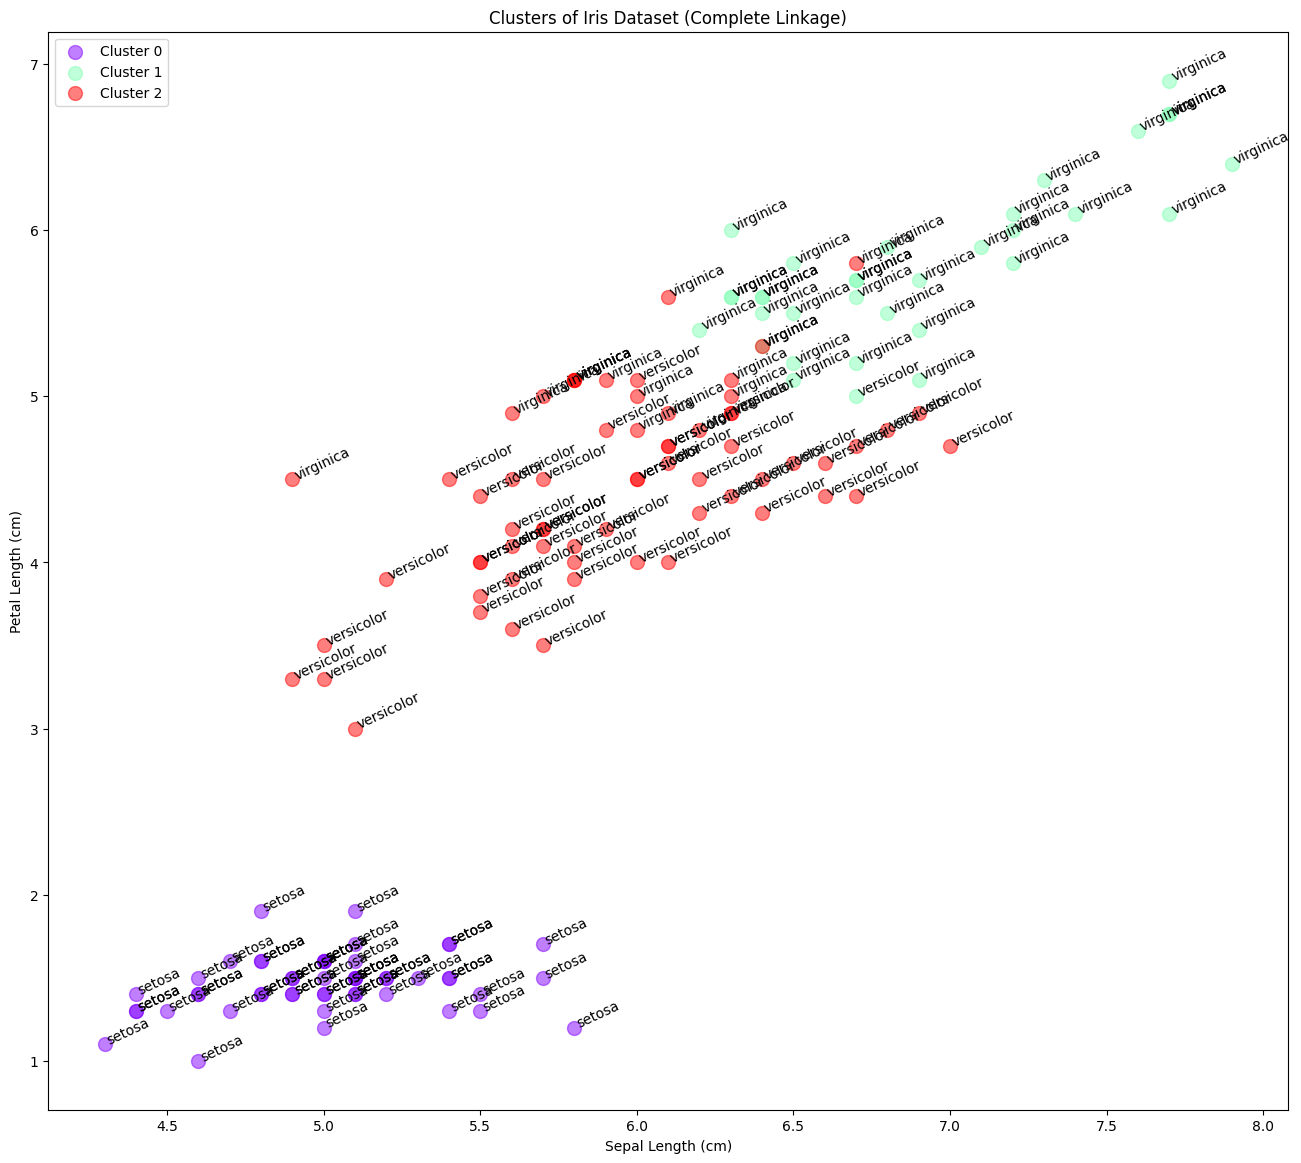

In [ ]:
# Mengimpor colormap 'rainbow' untuk memberikan warna berbeda pada setiap kluster
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Melakukan Agglomerative Clustering dengan metode Single Linkage
agglom_clusters = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(feature_mtx)

# Menambahkan label kluster ke DataFrame Iris
iris_df['cluster_'] = agglom_clusters.labels_

# Menentukan jumlah kluster berdasarkan label yang dihasilkan
n_clusters = max(iris_df['cluster_']) + 1

# Membuat array warna untuk setiap kluster menggunakan colormap 'rainbow'
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label kluster dari 0 hingga jumlah kluster-1
cluster_labels = list(range(0, n_clusters))

# Membuat figure untuk plot
plt.figure(figsize=(16, 14))

# Iterasi untuk setiap kluster, warna, dan label kluster
for color, label in zip(colors, cluster_labels):
    # Memilih data subset berdasarkan label kluster
    subset = iris_df[iris_df['cluster_'] == label]

    # Menambahkan teks nama spesies untuk setiap titik data dalam subset
    # Use subset.index to iterate through the subset's index
    for i in subset.index:
        plt.text(subset.loc[i, 'sepal length (cm)'],  # Sepal Length using column name
                 subset.loc[i, 'petal length (cm)'],  # Petal Length using column name
                 str(subset.loc[i, 'target_names']),  # Access target_names using loc
                 rotation=25)

    # Menampilkan titik data dalam subset dengan warna berbeda untuk setiap kluster
    plt.scatter(
        subset.iloc[:, 0],  # Fitur ke-0 (sepal length)
        subset.iloc[:, 2],  # Fitur ke-2 (petal length)
        s=100,              # Ukuran titik
        c=color,            # Warna berdasarkan kluster
        label='Cluster ' + str(label),
        alpha=0.5
    )

# Menambahkan legenda untuk membedakan kluster
plt.legend()

# Menambahkan judul dan label pada sumbu X dan Y
plt.title('Clusters of Iris Dataset (Complete Linkage)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

# Menampilkan plot
plt.show()

In [ ]:
# Mengelompokkan data berdasarkan kolom 'cluster_' (klaster) dan 'target_names' (tipe spesies)
# Kemudian menghitung jumlah data dalam setiap grup yang terbentuk (jumlah bunga)
iris_df.groupby(['cluster_', 'target_names'])['cluster_'].count()

cluster_  target_names
0         setosa          50
1         versicolor       1
          virginica       33
2         versicolor      49
          virginica       17
Name: cluster_, dtype: int64

In [ ]:
# Mengonversi kolom yang digunakan untuk mean menjadi numeric,
# dengan errors='coerce' untuk mengubah non-numeric menjadi NaN
iris_df[iris.feature_names] = iris_df[iris.feature_names].apply(pd.to_numeric, errors='coerce')

# Mengelompokkan data berdasarkan 'cluster_' dan 'target_names' (species)
agg_iris = iris_df.groupby(['cluster_', 'target_names'])[iris.feature_names].mean()

# Menampilkan hasilnya
agg_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ target_names                                                           
0        setosa                 5.006000          3.428000           1.462000   
1        versicolor             6.700000          3.000000           5.000000   
         virginica              6.893939          3.118182           5.806061   
2        versicolor             5.920408          2.765306           4.244898   
         virginica              5.994118          2.694118           5.058824   

                       petal width (cm)  
cluster_ target_names                    
0        setosa                0.246000  
1        versicolor            1.700000  
         virginica             2.133333  
2        versicolor            1.318367  
         virginica             1.817647

<ipython-input-177-c1f61f424c06>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0] + 0.1,  # Menyesuaikan posisi teks (panjang sepal)
<ipython-input-177-c1f61f424c06>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  subset.loc[i][2] + 0.1,  # Menyesuaikan posisi teks (panjang petal)
<ipython-input-177-c1f61f424c06>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to

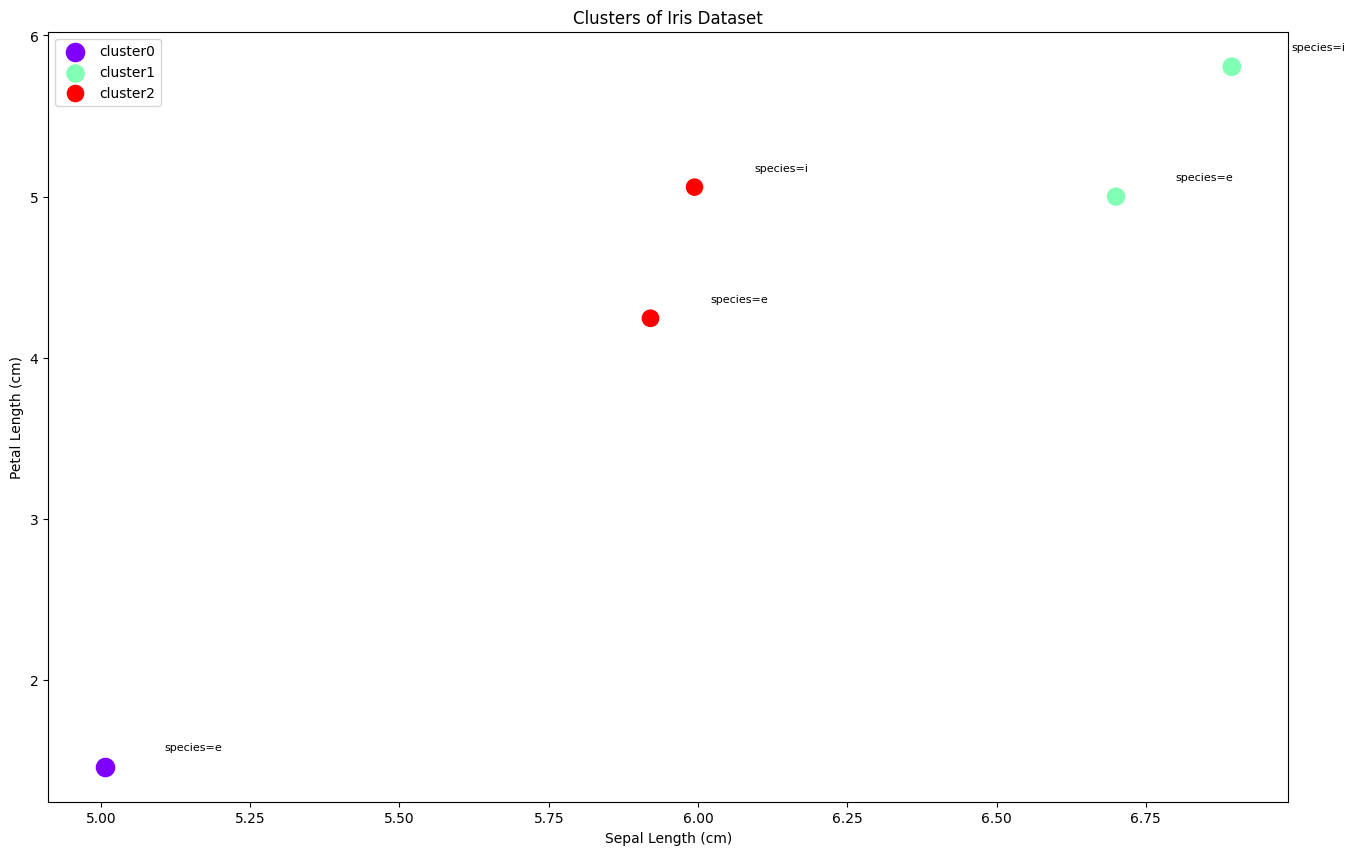

In [ ]:
# Diasumsikan agg_iris dan colors sudah didefinisikan sebelumnya

plt.figure(figsize=(16, 10))
for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]
    for i in subset.index:
        # Menambahkan teks nama spesies di setiap titik
        plt.text(subset.loc[i][0] + 0.1,  # Menyesuaikan posisi teks (panjang sepal)
                 subset.loc[i][2] + 0.1,  # Menyesuaikan posisi teks (panjang petal)
                 'species=' + str(i[1]),  # Menampilkan nama spesies
                 fontdict={'fontsize': 8})
    # Membuat scatter plot untuk setiap cluster
    plt.scatter(subset['sepal length (cm)'],
                subset['petal length (cm)'],
                s=subset['sepal width (cm)'] * 50,
                c=color,
                label='cluster' + str(label))

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

Single Linkage mengukur jarak antar kluster berdasarkan titik terdekat dari kluster berbeda. Pada dataset Iris, metode ini sering menghasilkan kluster yang panjang dan kurang terpisah, karena data saling terhubung dalam bentuk rantai. Versicolor dan Virginica sering tergabung dalam satu kluster besar karena kemiripan di beberapa titik.

Complete Linkage menggunakan jarak terjauh antara dua titik dari kluster berbeda. Hasilnya adalah kluster yang lebih kecil, kompak, dan terpisah dengan baik. Pada dataset Iris, metode ini memisahkan spesies dengan lebih jelas, seperti Setosa yang tetap menjadi kluster terpisah karena sangat berbeda dari dua spesies lainnya.

Average Linkage mengukur jarak antar kluster sebagai rata-rata jarak antar semua titik dari dua kluster. Metode ini memberikan hasil yang seimbang antara Single dan Complete Linkage. Pada dataset Iris, Setosa tetap terpisah, sementara Versicolor dan Virginica dikelompokkan lebih wajar karena beberapa overlap dalam karakteristik mereka.